# Exploratory Data Analysis

We were provided with the Zillow Data Set that consisted of housing Data. The data consisted of properties with their features. Hence, we first went in depth to understand the various features and their significance by studing various housing sites

### Understanding the Data
We first start by understanding the features and its significance in the housing domain . We understood the significance of features property land use code, property land use code, fips to name a few. Next , we identified the diffrent data types in the data to understand the features. Concepts like one hot encoding, dummy variables was understood after deep inspection of the data.

The data consisted of the log error (which is to be predicted).

Log Error=log(Zprice)-log(Zestimate)

### Data Pipeline

1. Data Ingestion 
2. Exploratory Data Analysis
3. Feature Selection
4. Prediction

In [2]:
import pandas as pd
from pandas import DataFrame,read_csv
import numpy as np
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.utils import check_array
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pylab as pl
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


C:\Users\jaini\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Data Ingestion
We were provided with Train and Property data sets for the year 2016 and 2017.
Property Dataset - The Property Data Set consists of list of features for properties
Train Dataset- The Train data set consists of list of transactions that occured for the different properties.
Hence, we have merged Property Data Set with Train data set based on a parcel id (which is a unique identifier). We then merged the two 2 data frames which are diffrentiated by the year column

In [3]:
#let's take all the csvs and merged them
prop2017=pd.read_csv("properties_2017.csv")
train2017=pd.read_csv("train_2017.csv",parse_dates=['transactiondate'])

prop2016=pd.read_csv("properties_2016.csv")
train2016=pd.read_csv("train_2016_v2.csv",parse_dates=['transactiondate'])
merged_17=train2017.merge(prop2017,on='parcelid',how='inner')
merged_16=train2016.merge(prop2016,on='parcelid',how='inner')
merged_16['year']=2016
merged_17['year']=2017
frames=[merged_17,merged_16]
finmerged=pd.concat(frames)
finmerged.reset_index(inplace=True)

C:\Users\jaini\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\jaini\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Exploratory Data Analysis

### Data Type of each feature

In [4]:
##lets first see the data types of the columns
finmerged.drop('index',axis=1,inplace=True)
print(finmerged.dtypes)

parcelid                                 int64
logerror                               float64
transactiondate                 datetime64[ns]
airconditioningtypeid                  float64
architecturalstyletypeid               float64
basementsqft                           float64
bathroomcnt                            float64
bedroomcnt                             float64
buildingclasstypeid                    float64
buildingqualitytypeid                  float64
calculatedbathnbr                      float64
decktypeid                             float64
finishedfloor1squarefeet               float64
calculatedfinishedsquarefeet           float64
finishedsquarefeet12                   float64
finishedsquarefeet13                   float64
finishedsquarefeet15                   float64
finishedsquarefeet50                   float64
finishedsquarefeet6                    float64
fips                                   float64
fireplacecnt                           float64
fullbathcnt  

We observed that a couple of features do not have the right data types like Tax Delinquincy Flag, Structure Tax Value Dollar Count,hashorhottub which has the data type object. These were further converted for ease of use ahead for algorithms . The values of these data types were either 'True' or 'False' or 'Yes' or 'No'

In [ ]:
##there are some datatypes that are wrong let's correct them first
##like taxdelinquencyflag, fireplaceflag,hashottuborspa

We inspect the value counts for each of the below fields which had object data types and replaced "Yes"or "True" with 1 for the usability and future usage in the various algorithms

In [5]:
print(finmerged['taxdelinquencyflag'].value_counts())
finmerged['taxdelinquencyflag'].replace("Y",1,inplace=True)
print(finmerged['hashottuborspa'].value_counts())
finmerged['hashottuborspa'].replace(True,1,inplace=True)
print(finmerged['fireplaceflag'].value_counts())
finmerged['fireplaceflag'].replace(True,1,inplace=True)
##letscheck the datatypes again
print(finmerged.dtypes)

Y    4683
Name: taxdelinquencyflag, dtype: int64
True    3904
Name: hashottuborspa, dtype: int64
True    394
Name: fireplaceflag, dtype: int64
parcelid                                 int64
logerror                               float64
transactiondate                 datetime64[ns]
airconditioningtypeid                  float64
architecturalstyletypeid               float64
basementsqft                           float64
bathroomcnt                            float64
bedroomcnt                             float64
buildingclasstypeid                    float64
buildingqualitytypeid                  float64
calculatedbathnbr                      float64
decktypeid                             float64
finishedfloor1squarefeet               float64
calculatedfinishedsquarefeet           float64
finishedsquarefeet12                   float64
finishedsquarefeet13                   float64
finishedsquarefeet15                   float64
finishedsquarefeet50                   float64
finishedsqu

As observed above, we have changed the data types of the features mentioned above. Next, in order to get a deeper understanding of each of the feature we viewed the mean, standard deviation , minimum and maximum values. This helped us figure out if there were any anomalies standing out in the data.

In [6]:
##lets check the datasets 
print(finmerged.describe())

           parcelid       logerror  airconditioningtypeid  \
count  1.678880e+05  167888.000000           53788.000000   
mean   1.299536e+07       0.013906               1.814345   
std    3.016071e+06       0.165706               2.970239   
min    1.071174e+07      -4.655420               1.000000   
25%    1.154899e+07      -0.025300               1.000000   
50%    1.254060e+07       0.006000               1.000000   
75%    1.421930e+07       0.039200               1.000000   
max    1.676893e+08       5.262999              13.000000   

       architecturalstyletypeid  basementsqft    bathroomcnt     bedroomcnt  \
count                468.000000     93.000000  167854.000000  167854.000000   
mean                   7.299145    695.376344       2.288265       3.041739   
std                    2.719633    583.952144       1.000835       1.149134   
min                    2.000000     38.000000       0.000000       0.000000   
25%                    7.000000    280.000000       2.0

Next, we got a the list of features for the properties.

In [7]:
finmerged.columns

Index(['parcelid', 'logerror', 'transactiondate', 'airconditioningtypeid',
       'architecturalstyletypeid', 'basementsqft', 'bathroomcnt', 'bedroomcnt',
       'buildingclasstypeid', 'buildingqualitytypeid', 'calculatedbathnbr',
       'decktypeid', 'finishedfloor1squarefeet',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12',
       'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50',
       'finishedsquarefeet6', 'fips', 'fireplacecnt', 'fullbathcnt',
       'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcn

### Correlation of Tax Data with Log error

Next, we identified all fields that had Tax data and checked their correlation with logerror. 

In [ ]:
#plotting correlation matrix w.r.t to type of data and logerror

                            structuretaxvaluedollarcnt  taxvaluedollarcnt  \
structuretaxvaluedollarcnt                    1.000000           0.810343   
taxvaluedollarcnt                             0.810343           1.000000   
landtaxvaluedollarcnt                         0.605098           0.956571   
taxamount                                     0.796876           0.970235   
taxdelinquencyflag                                 NaN                NaN   
logerror                                      0.015546           0.005332   

                            landtaxvaluedollarcnt  taxamount  \
structuretaxvaluedollarcnt               0.605098   0.796876   
taxvaluedollarcnt                        0.956571   0.970235   
landtaxvaluedollarcnt                    1.000000   0.923791   
taxamount                                0.923791   1.000000   
taxdelinquencyflag                            NaN        NaN   
logerror                                -0.000759  -0.002186   

           

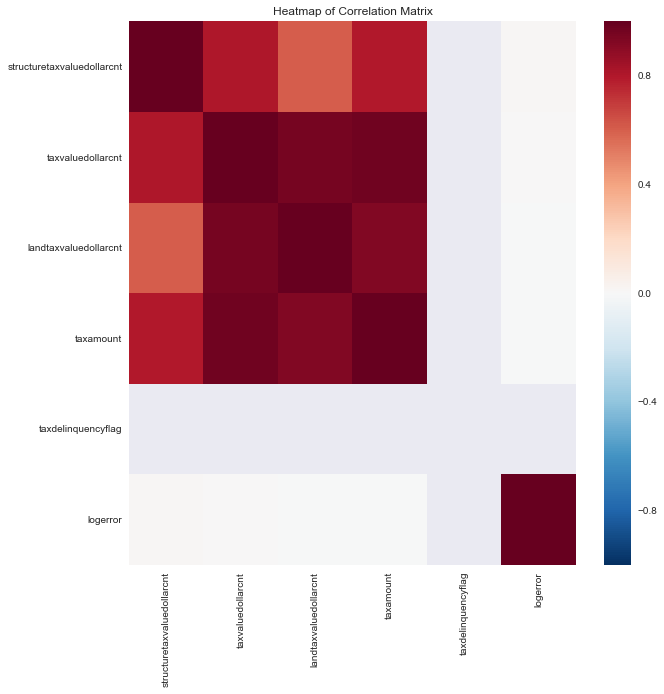

In [8]:
#ploting the correlation between tax data and log error
taxdata=finmerged[['structuretaxvaluedollarcnt','taxvaluedollarcnt','landtaxvaluedollarcnt','taxamount','taxdelinquencyflag','logerror']]
print(taxdata.corr())
a4_dims = (10, 10)
corr = taxdata.corr()
corr = (corr)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           ax=ax)

plt.title('Heatmap of Correlation Matrix')

plt.show()


Correlation of 1 is the Maximum correlation that can exist. We observed that these features have no strong correlation with logerror as per the heatmap. Though we do observe that structuretaxvaluedollarcnt and taxvaluedollarcnt have a correlation with logerror of 0.01 and 0.005 which is not strong but one of the highest among the the Tax Data features. 

In [ ]:
#no correlation between log error found

### Correlation of Numerical fields with Log Error

Next, we plotted the correlation matrix between numerical values and logerror with the help of a correlation heatmap. It is observed that the correlation is not strong but a little better than the Tax Features. These are consistently in the range 0.02.

                   bedroomcnt  bathroomcnt  calculatedbathnbr  poolcnt  \
bedroomcnt           1.000000     0.641287           0.618166      NaN   
bathroomcnt          0.641287     1.000000           1.000000      NaN   
calculatedbathnbr    0.618166     1.000000           1.000000      NaN   
poolcnt                   NaN          NaN                NaN      NaN   
garagecarcnt         0.436072     0.499015           0.475121      NaN   
roomcnt              0.165607     0.041359           0.030722      NaN   
unitcnt              0.134703     0.086278           0.182662      NaN   
numberofstories      0.156218     0.325685           0.373903      NaN   
logerror             0.028513     0.027038           0.029432      NaN   

                   garagecarcnt   roomcnt   unitcnt  numberofstories  logerror  
bedroomcnt             0.436072  0.165607  0.134703         0.156218  0.028513  
bathroomcnt            0.499015  0.041359  0.086278         0.325685  0.027038  
calculatedbathnb

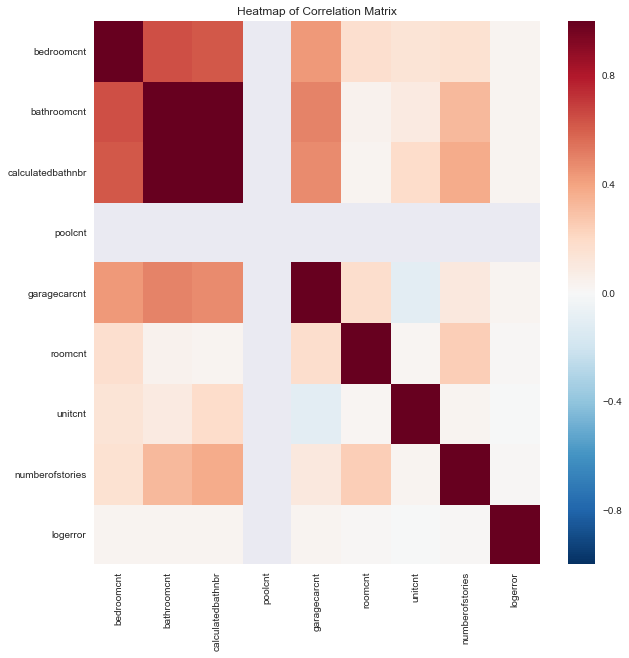

In [9]:
#finding correlation with numeric values
room=finmerged[['bedroomcnt','bathroomcnt','calculatedbathnbr','poolcnt','garagecarcnt','roomcnt','unitcnt','numberofstories','logerror']]
print(room.corr())
a4_dims = (10, 10)
corr = room.corr()
corr = (corr)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           ax=ax)

plt.title('Heatmap of Correlation Matrix')

plt.show()

### Correlation of Area Features with Log Error

Next, we checked the correlation between area features and log error. Here, we observed that there is a relatively strong correlation between basement square feet and log error. Additionally, finishedsquarefeet12 and calculatedfinishedsquarefeet seemed to be highly correlated which we have handled under missing value handling.

                              basementsqft  finishedfloor1squarefeet  \
basementsqft                      1.000000                  0.197733   
finishedfloor1squarefeet          0.197733                  1.000000   
calculatedfinishedsquarefeet      0.292972                  0.715416   
finishedsquarefeet12              0.292972                  0.715459   
finishedsquarefeet50              0.112014                  0.969230   
finishedsquarefeet6                    NaN                       NaN   
garagetotalsqft                   0.272369                  0.595655   
lotsizesquarefeet                 0.056378                  0.346679   
yardbuildingsqft17                0.073589                  0.393797   
logerror                          0.324681                  0.007591   

                              calculatedfinishedsquarefeet  \
basementsqft                                      0.292972   
finishedfloor1squarefeet                          0.715416   
calculatedfinishedsqu

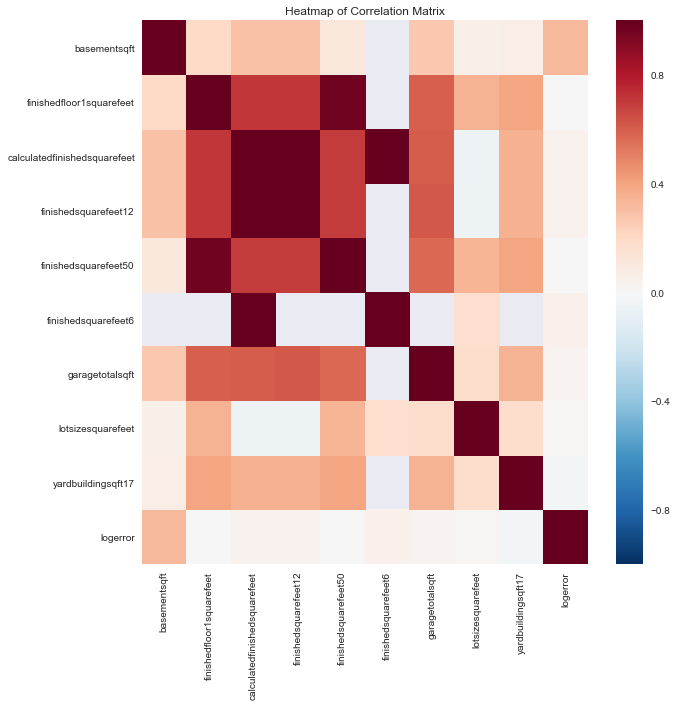

In [10]:
#findingcorrelation with area features
area=finmerged[['basementsqft','finishedfloor1squarefeet','calculatedfinishedsquarefeet','finishedsquarefeet12','finishedsquarefeet50','finishedsquarefeet6','garagetotalsqft','lotsizesquarefeet','yardbuildingsqft17','logerror']]
print(area.corr())
a4_dims = (10, 10)
corr = area.corr()
corr = (corr)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           ax=ax)

plt.title('Heatmap of Correlation Matrix')

plt.show()

### Correlation of Categorical Features and Log Error

Next, we tried to check correlation between categorical fields and log error. We observe that a few fields are correlated with log error but alot of the fields are negatively correlated to log error as well. Additionally categorical values like pool type id 2 and pool type id 7 so not even seem to be correlate it log error. Note :Rawcensustractandblock and Censustractandblock have very high correlation . hence, we have handled these in Handling Missing Values Section.

                          airconditioningtypeid  architecturalstyletypeid  \
airconditioningtypeid                  1.000000                 -0.072481   
architecturalstyletypeid              -0.072481                  1.000000   
buildingclasstypeid                         NaN                       NaN   
buildingqualitytypeid                  0.000805                       NaN   
decktypeid                                  NaN                       NaN   
fips                                   0.802065                 -0.046004   
hashottuborspa                              NaN                       NaN   
heatingorsystemtypeid                  0.168493                  0.039101   
pooltypeid10                                NaN                       NaN   
pooltypeid7                                 NaN                       NaN   
pooltypeid2                                 NaN                       NaN   
propertylandusetypeid                 -0.194000                  0.045455   

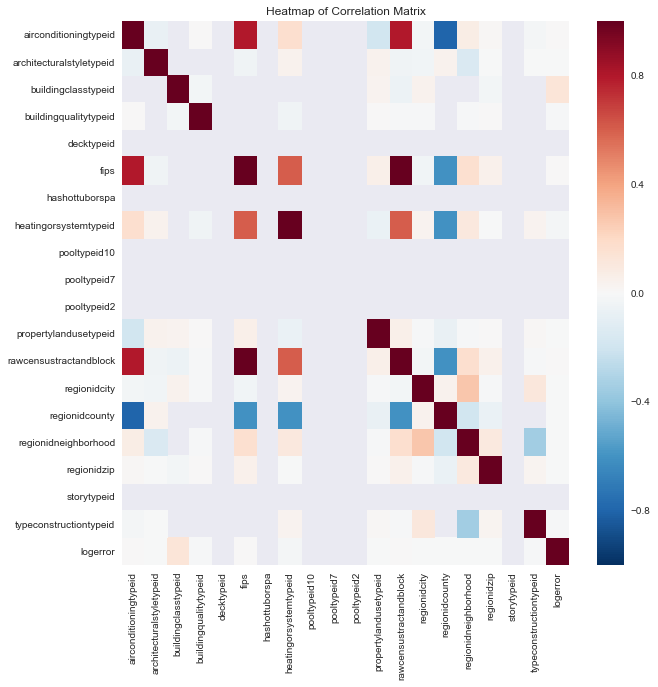

In [11]:
#correlation with regions 
ids=finmerged[['airconditioningtypeid','architecturalstyletypeid','buildingclasstypeid','buildingqualitytypeid','decktypeid','fips','hashottuborspa','heatingorsystemtypeid','pooltypeid10','pooltypeid7','pooltypeid2','propertycountylandusecode','propertylandusetypeid','propertyzoningdesc','rawcensustractandblock', u'regionidcity', u'regionidcounty',
       u'regionidneighborhood', u'regionidzip',u'storytypeid', u'typeconstructiontypeid','logerror']]
print(ids.corr())
a4_dims = (10, 10)
corr = ids.corr()
corr = (corr)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           ax=ax)

plt.title('Heatmap of Correlation Matrix')

plt.show()

The above correlations indicated that we must try and replace the missing values for the fields taken into consideration and study the features in depth further.

### Count of Missing Values per Feature

Next we plotted a Bar chart of all features wih a count of their missing values. We observe that buildingclasstypeid, basement squarefeet ,finished square feet 13 have the most number of missing values. Features CensusTrackandblock and structuretaxvaluedollarcount have the least number of missing values 

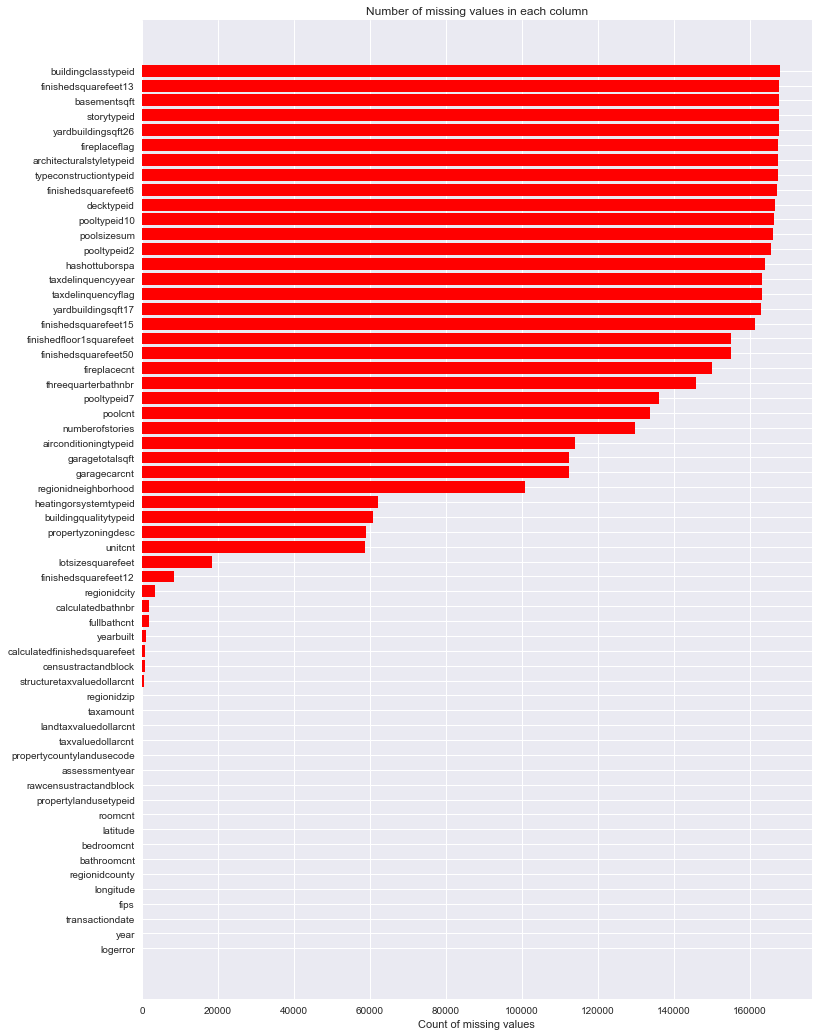

In [12]:
##These corrlation maps will help us handle missing data values 
##lets plot a graph showing missing data
miss_val =finmerged.isnull().sum().reset_index()
miss_val.columns = ['column_name', 'missing_count']
miss_val.drop(0,inplace=True)
miss_val = miss_val.sort_values(by='missing_count')
ind = np.arange(miss_val.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, miss_val.missing_count.values, color='red')
ax.set_yticks(ind)
ax.set_yticklabels(miss_val.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

### Analysis of distribution for each feature

Next, we tried to analyze if there was a normal distribution for each feature. We plotted histograms for each of the features to understand the frequency distribution. We provided a bin size of 50 and tried to understand the distribution of the data. For many of the features we could distinctly identify the distribution like basementsquarefeet, finishedfloorsquarefeet and yard building squarefeet to name a few.

In [13]:
#lets see the normal distribution of the columns data and see what we find and
columns=finmerged.columns
columns

Index(['parcelid', 'logerror', 'transactiondate', 'airconditioningtypeid',
       'architecturalstyletypeid', 'basementsqft', 'bathroomcnt', 'bedroomcnt',
       'buildingclasstypeid', 'buildingqualitytypeid', 'calculatedbathnbr',
       'decktypeid', 'finishedfloor1squarefeet',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12',
       'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50',
       'finishedsquarefeet6', 'fips', 'fireplacecnt', 'fullbathcnt',
       'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcn

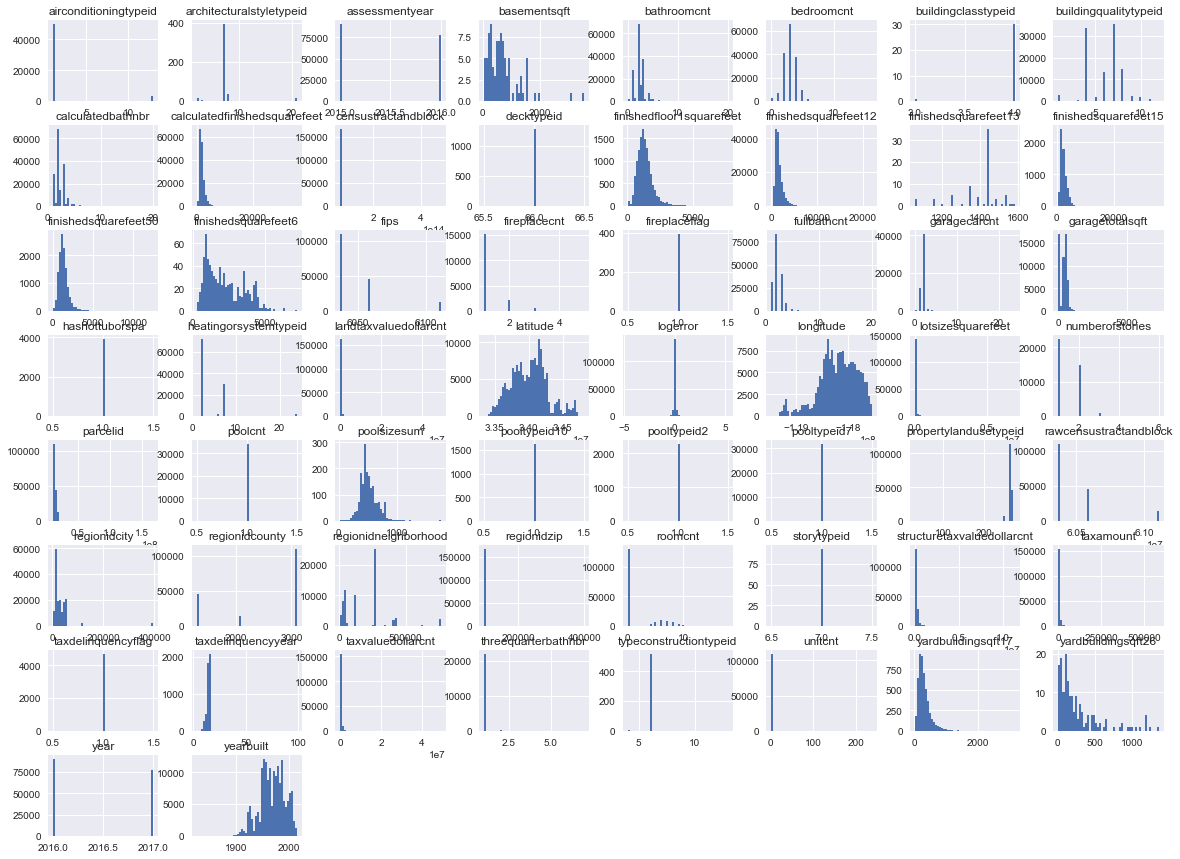

In [14]:
#lets take a quick look at the histogram plot of the data and see if we cna find something abnormal in it
%matplotlib inline
import matplotlib.pyplot as plt
finmerged.hist(bins=50,figsize=(20,15))
plt.show()

### Joint plot of Basement Square Feet and Log Error

Since, basement squarefeet had reasonably strong correlation with log error while analysing the correlation , we checked the bivariate distibution and univariate distribution of te relationship of these features which provided the Pearson's coefficient as well.

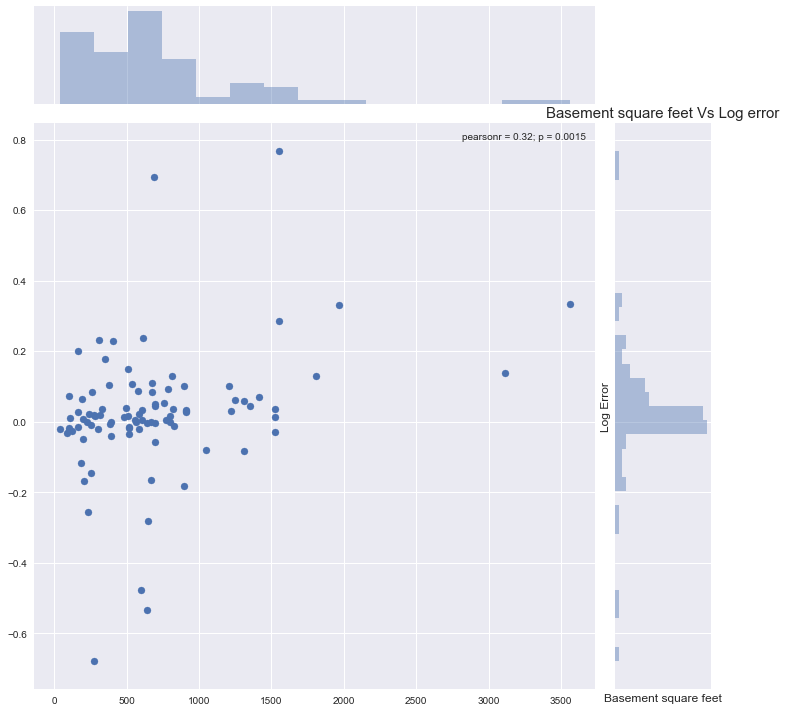

In [15]:
#from the correlation matrix we found that basement sqft had a relation with the logerror let's see

plt.figure(figsize=(8,8))
sns.jointplot(x=finmerged.basementsqft.values, y=finmerged.logerror.values, size=10)
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('Basement square feet', fontsize=12)
plt.title("Basement square feet Vs Log error", fontsize=15)
plt.show()

In [ ]:
#lets se what happens when we replace it with 0
#finmerged['basementsqft'].fillna(0,inplace=True)
#plt.figure(figsize=(8,8))
#sns.jointplot(x=finmerged.basementsqft.values, y=finmerged.logerror.values, size=10)
#plt.ylabel('Log Error', fontsize=12)
#plt.xlabel('Basement square feet', fontsize=12)
#plt.title("Basement square feet Vs Log error", fontsize=15)
#plt.show()

In [ ]:
#replacing with zero is not a good idea pull back lets try to fill it up with mean
# finmerged['basementsqft'].fillna(merged_17.basementsqft.mean(),inplace=True)
# plt.figure(figsize=(8,8))
# sns.jointplot(x=finmerged.basementsqft.values, y=finmerged.logerror.values, size=10)
# plt.ylabel('Log Error', fontsize=12)
# plt.xlabel('Basement square feet', fontsize=12)
# plt.title("Basement square feet Vs Log error", fontsize=15)
# plt.show()
#replacing with mean is also not a good idea
#we will come back to it later
#buildingclasstypeid also has a correlation with the logerror lets see the jointplot

### Analysis of BuildingClassTypeId and Log Error

Since, Building Class Type Id had reasonably strong correlation with log error while analysing the correlation , we checked the bivariate distibution and univariate distribution of the relationship of these features which provided the Pearson's coefficient as well.



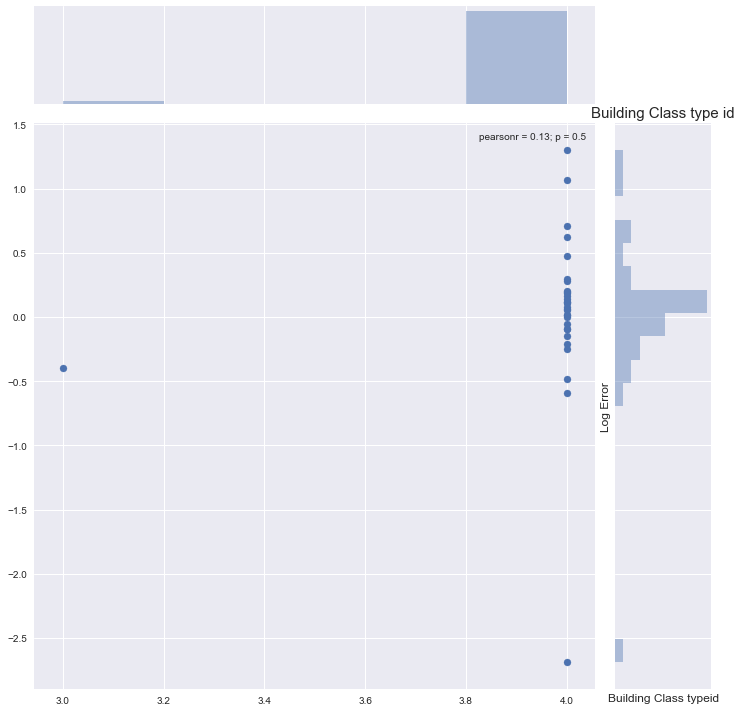

4.0    30
3.0     1
Name: buildingclasstypeid, dtype: int64
167857


In [16]:
plt.figure(figsize=(8,8))
sns.jointplot(x=finmerged.buildingclasstypeid.values, y=finmerged.logerror.values, size=10)
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('Building Class typeid', fontsize=12)
plt.title("Building Class type id", fontsize=15)
plt.show()
print(finmerged['buildingclasstypeid'].value_counts())
print(finmerged['buildingclasstypeid'].isnull().sum())
#it doesnot make sense to keep this column lets drop it with only 14 values
finmerged.drop('buildingclasstypeid',axis=1,inplace=True)


Next, we revisited the correlation of the features with respect to log error and sorted the values for ease of understanding.

In [17]:
correlation=pd.DataFrame(finmerged[finmerged.columns[:]].corr()['logerror'])
correlation.sort_values('logerror',inplace=True)
correlation

,logerror
taxdelinquencyyear,-0.051464
finishedsquarefeet13,-0.040595
yardbuildingsqft17,-0.030916
heatingorsystemtypeid,-0.016296
typeconstructiontypeid,-0.011416
finishedsquarefeet15,-0.008050
buildingqualitytypeid,-0.007896
regionidcounty,-0.007566
architecturalstyletypeid,-0.006321
regionidneighborhood,-0.005500


In [18]:
#lets see if there is any change in our correlation with logerror
correlation=pd.DataFrame(finmerged[finmerged.columns[:]].corr()['logerror'])
correlation.sort_values('logerror',inplace=True)
correlation

,logerror
taxdelinquencyyear,-0.051464
finishedsquarefeet13,-0.040595
yardbuildingsqft17,-0.030916
heatingorsystemtypeid,-0.016296
typeconstructiontypeid,-0.011416
finishedsquarefeet15,-0.008050
buildingqualitytypeid,-0.007896
regionidcounty,-0.007566
architecturalstyletypeid,-0.006321
regionidneighborhood,-0.005500


### Number of Transactions over Time

In order to identify if there was any relation between between the transactions over time we plotted the below graph. The obeserved that the number of transactions were the greatest for the month of June and least for the month of December

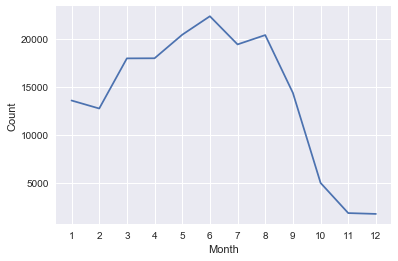

In [19]:
#lets see the effect number of transactions over time
train_data=finmerged.copy()
train_data['fintime']=pd.to_datetime(train_data['transactiondate'])
def hr_func(ts):
    return ts.month
train_data['time_hour'] = train_data['fintime'].apply(hr_func)

Time_Trend=train_data[['parcelid','time_hour']].groupby(['time_hour'])['parcelid'].count().reset_index(name='count').sort_values(['time_hour'],ascending=True)



#PLotting graph of TimeSeries
x = np.array(range(len(Time_Trend)))
y = Time_Trend['count']
my_xticks = Time_Trend['time_hour']
#plt.xticks(count_code.index, count_code['code'], rotation=90,y='count')
plt.xticks(x, my_xticks)
#plt.plot(x,y)
#plt.xticks(rotation=70)
plt.plot(x,y)
plt.ylabel('Count')
plt.xlabel('Month')
# plt.savefig(os.path.join('Part1','TimeSeries.png'),dpi=100)
#droppingcolumn fintime
plt.show()
plt.clf()
del train_data['fintime']
del train_data['time_hour']

### Analysis of Transaction Months with Mean Log Error

We plotted the mean log error over the months. We observed that the mean log error was the highest for the month of October.

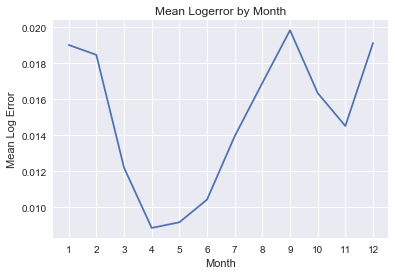

In [20]:
#let see the the effect of logerror and time
train_data=finmerged.copy()

train_data['fintime']=pd.to_datetime(train_data['transactiondate'])
def hr_func(ts):
    return ts.month
train_data['time_month'] = train_data['fintime'].apply(hr_func)

Time_Trend=train_data[['logerror','time_month']].groupby(['time_month'])['logerror'].mean().reset_index(name='mean').sort_values(['time_month'],ascending=True)



#PLotting graph of TimeSeries
x = np.array(range(len(Time_Trend)))
y = Time_Trend['mean']
my_xticks = Time_Trend['time_month']
#plt.xticks(count_code.index, count_code['code'], rotation=90,y='count')
plt.xticks(x, my_xticks)
#plt.plot(x,y)
#plt.xticks(rotation=70)
plt.plot(x,y)
plt.title('Mean Logerror by Month')
plt.ylabel('Mean Log Error')
plt.xlabel('Month')
# plt.savefig(os.path.join('Part1','TimeSeries.png'),dpi=100)
#droppingcolumn fintime
plt.show()
plt.clf()
del train_data['fintime']
del train_data['time_month']

Observation :From the above two graphs we see that as the number of transaction decrease the log error increases and as the number of transaction increased the mean log error decreased

In [ ]:
#from the above two graphs we see that as the number of transaction decrease the log error increases and as the number of transaction decreased
#the mean log error decreased
#this let me to create a new column in our dataset month

In [21]:
def hr_func(ts):
    return ts.month
finmerged['time_month'] = finmerged['transactiondate'].apply(hr_func)

### Joint Plot of Month and Logerror
Plotted a Joint plot of the mean log error vs Month to understand the univariate and Bivariate relations. The Bivariate distribution aids us to understand the probability distribution of the 2 random variables Log Error and Month. The Univariate axis helps understand the individual distribution of the month and the log error. 
Note : We do see that the plot displays a low pearson coefficient but we will explre tis furtjer with feature selection algorithms.

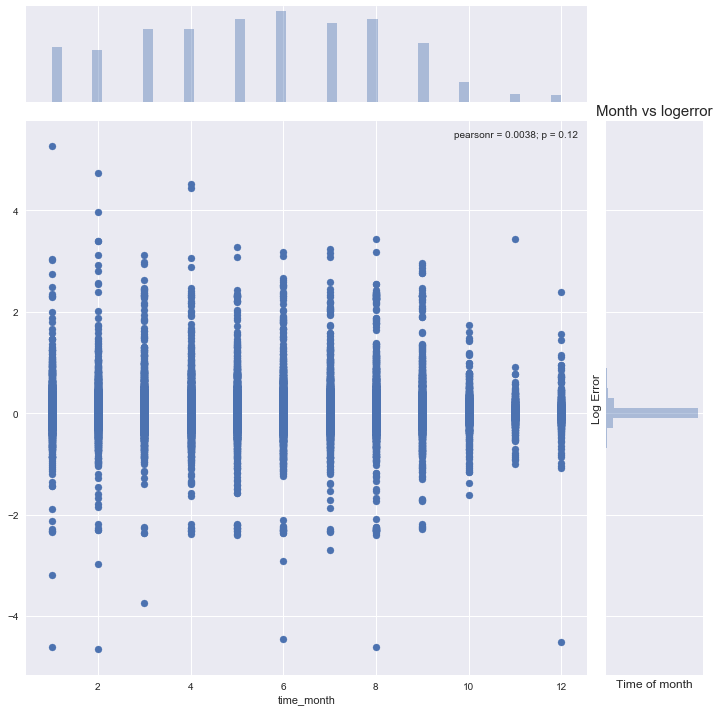

In [22]:
#lets plot the relation between the time month and logerror on a jointplot
plt.figure(figsize=(8,8))
sns.jointplot(x=finmerged.time_month, y=finmerged.logerror.values, size=10)
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('Time of month', fontsize=12)
plt.title("Month vs logerror", fontsize=15)
plt.show()


In [ ]:
#the plot shows a very low pearson correlation 
#but we will leave it upto our feature engineering algorithms to decide whether to keep it or not

###  Analysis of Count of Bedrooms

Next, we plotted a grah for the count of bedrooms . We observed that the most common bedrrom count in the data set was 3, followed by 2 and then 4. 

<function seaborn.utils.despine>

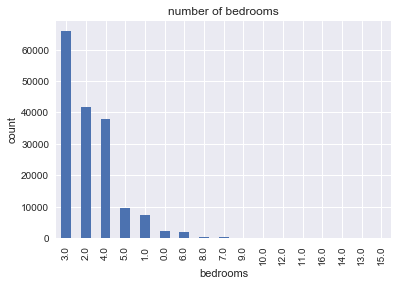

In [23]:
#lets look at some other relations
#let's see the most common bedrroom and bathroom counts for houses
finmerged['bedroomcnt'].value_counts().plot(kind='bar')
plt.title('number of bedrooms')
plt.xlabel('bedrooms')
plt.ylabel('count')
sns.despine

Next we studied the distribution of bedroom count vs logerror in a joint plot. We observed that in the joint plot for the bed room count 2-5 was the hardest to predict.

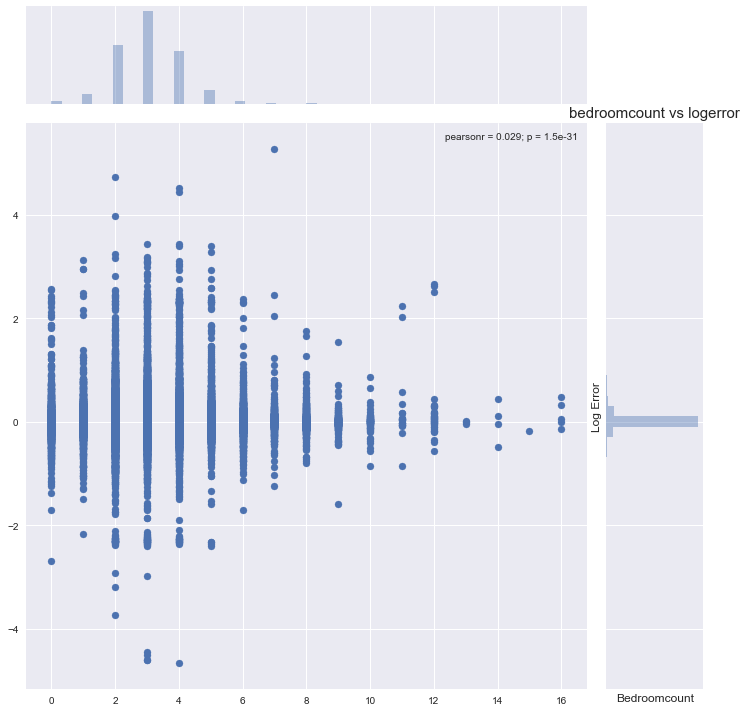

In [24]:
#we see that most of the houses have about 3 bedrooms 
#lets see the relation between bedroom count and logerror
plt.figure(figsize=(8,8))
sns.jointplot(x=finmerged.bedroomcnt.values, y=finmerged.logerror.values, size=10)
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('Bedroomcount', fontsize=12)
plt.title("bedroomcount vs logerror", fontsize=15)
plt.show()


## Analysis of Bathroom Count and Log Error

The analysis of count of bathrooms indicates the most is bathroom count 2. In the joint plot below it is identified that the bathroom count 2.5 was the hardest to predict.

<function seaborn.utils.despine>

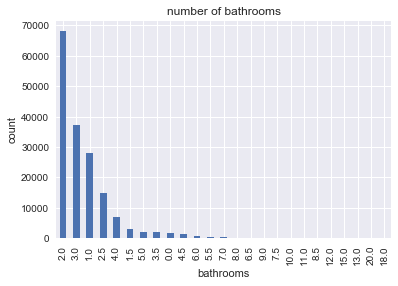

In [25]:
#the jointplot shows that it was the hardest to predict the houses with bedroom counts 2-5
#lets check the same for bathroomcnt
finmerged['bathroomcnt'].value_counts().plot(kind='bar')
plt.title('number of bathrooms')
plt.xlabel('bathrooms')
plt.ylabel('count')
sns.despine

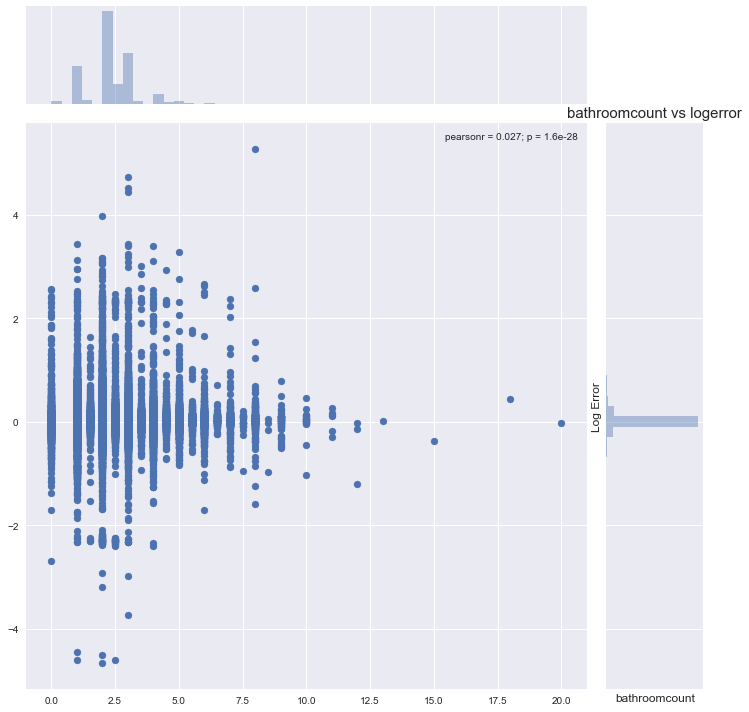

In [26]:
#so we see most of the houses have 2 bathrooms
plt.figure(figsize=(8,8))
sns.jointplot(x=finmerged.bathroomcnt.values, y=finmerged.logerror.values, size=10)
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('bathroomcount', fontsize=12)
plt.title("bathroomcount vs logerror", fontsize=15)
plt.show()


In [ ]:
#we see that for small houses their is a really large range of logerror
#what's weird is that many of the houses actually have 0 bedrooms and bathrooms which is weird we wil explore that later

### Analysis of Latitude and Longitude

We have plotted the Latitude an dLongitude to understand the distribution of data. The binomial distribution indicates that the latitude and longitude are close to uniformly distributed

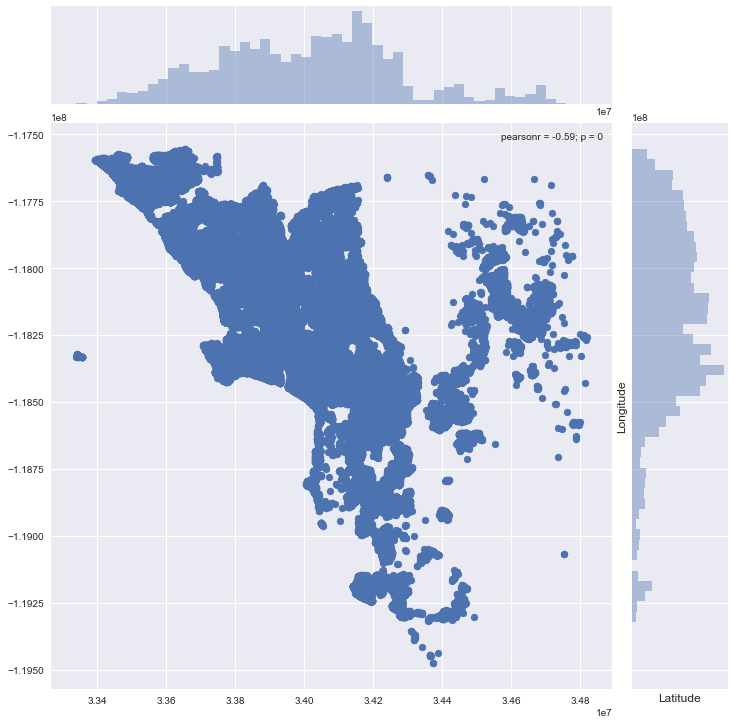

<function seaborn.utils.despine>

In [27]:
#lets plot the latitude and longitude of the dataset
plt.figure(figsize=(10,10))
sns.jointplot(x=finmerged.latitude.values,y=finmerged.longitude.values,size=10)
plt.ylabel('Longitude',fontsize=12)
plt.xlabel('Latitude',fontsize=12)
plt.show()
sns.despine

### Analysis of Lotsize vs Logerror

The scatter plot indicates the the highest lot size has log error close to zero. Additonally, there are lot sizes with the log error as zero.

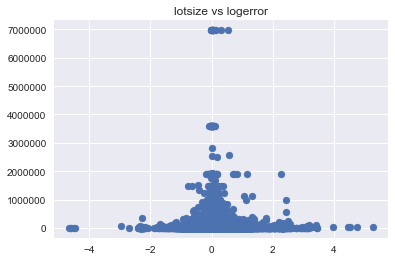

In [28]:
#lets see some other relations 
plt.scatter(finmerged.logerror,finmerged.lotsizesquarefeet)
plt.title("lotsize vs logerror")
plt.show()

### Analysis of Landtaxvaluedollarcnt vs Logerror

We observe that Landtaxvaluedollarcnt have logerror ranging from -4 to 4. Wit the highest being close to log error 0.

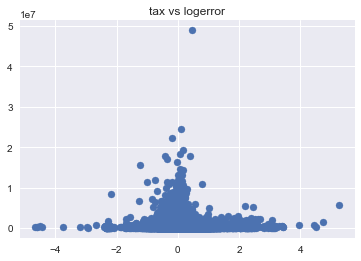

In [29]:
#we see that many houses have a lot size of 0 and we will see what's happening in there
plt.scatter(finmerged.logerror,finmerged.landtaxvaluedollarcnt)
plt.title("tax vs logerror")
plt.show()

### Analysis of Latitude and Longitude with Log Eror

We observe that most of the latitude and Longitude ranges are in the log error range of -2 to 2

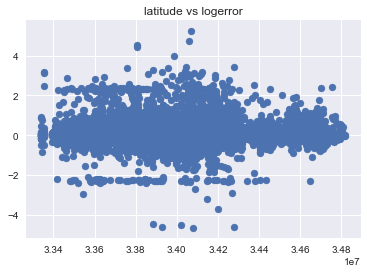

In [30]:
#let's see if the latitude has any relation with the logerror
plt.scatter(finmerged.latitude,finmerged.logerror)
plt.title("latitude vs logerror")
plt.show()

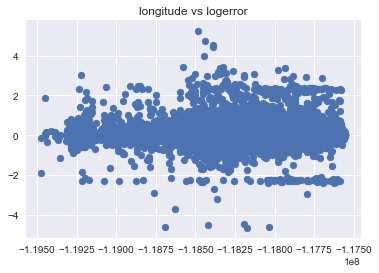

In [31]:
#let's see if the longitude has any relation with the logerror
plt.scatter(finmerged.longitude,finmerged.logerror)
plt.title("longitude vs logerror")
plt.show()

### Analysis of Airconditioningtypeid vs logerror

Here , we observe that there various airconditioningtypeid 2 and 4 have log error apporximately of all ranges, where as airconditioning id 5 and 9 are approximately have log error ranging from -2 to 2

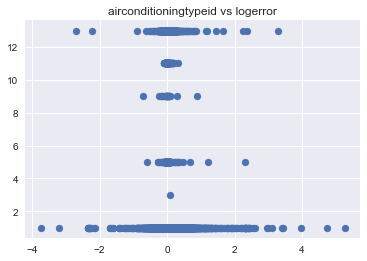

In [32]:
plt.scatter(finmerged.logerror,finmerged.airconditioningtypeid)
plt.title("airconditioningtypeid vs logerror")
plt.show()

### Analysis of Log Error

We observed the distribution of Log Error. We bserve that Log Error is uniformly distributed

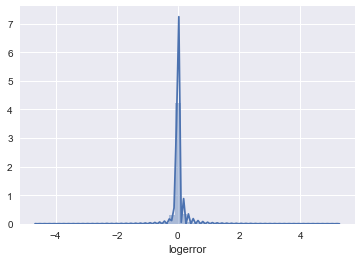

In [33]:
#lets check the normal distribution of our predcited value
sns.distplot(finmerged['logerror'])
plt.show()

## Analysis of Logerror with Calculated Finished Square Feet

From this we find that we found that for the small houses the logerror was actually low whereas for bigger ones that wasnt the log eror was not low.

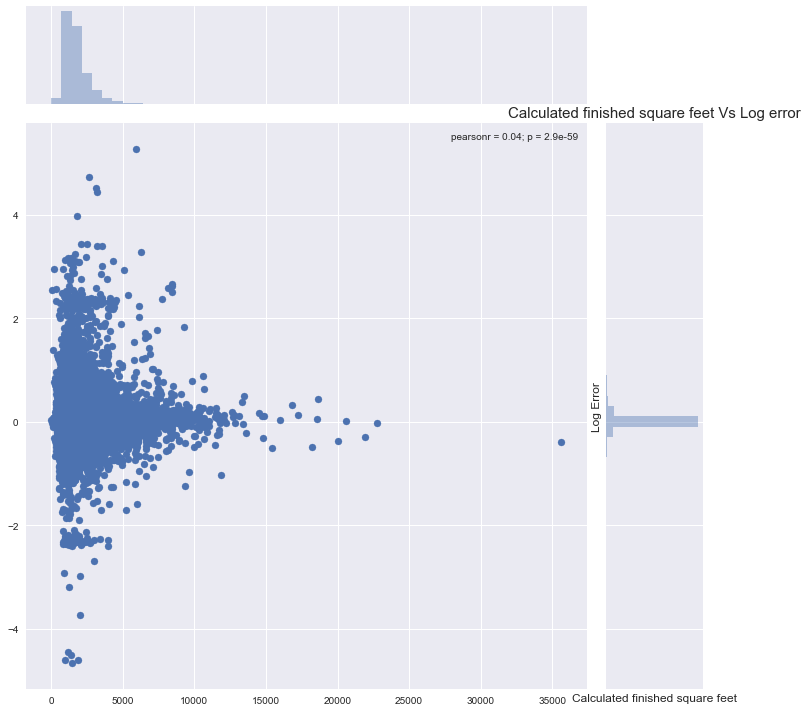

In [34]:
plt.figure(figsize=(12,12))
sns.jointplot(x=finmerged.calculatedfinishedsquarefeet.values, y=finmerged.logerror.values, size=10)
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('Calculated finished square feet', fontsize=12)
plt.title("Calculated finished square feet Vs Log error", fontsize=15)
plt.show()

In [ ]:
## From the EDA we found that for the small houses the logerror was actually low whereas for bigger ones that wasnt the case
#lets handle some missing values and do some early prediction with less variables for our benchmark model


## Missing Value Analysis and Handling

We observe that the missing values are large numbers for many of the features as observed below

In [35]:
print(finmerged.isnull().sum())

parcelid                             0
logerror                             0
transactiondate                      0
airconditioningtypeid           114100
architecturalstyletypeid        167420
basementsqft                    167795
bathroomcnt                         34
bedroomcnt                          34
buildingqualitytypeid            60715
calculatedbathnbr                 1832
decktypeid                      166616
finishedfloor1squarefeet        154995
calculatedfinishedsquarefeet       896
finishedsquarefeet12              8369
finishedsquarefeet13            167813
finishedsquarefeet15            161297
finishedsquarefeet50            154995
finishedsquarefeet6             167081
fips                                34
fireplacecnt                    149992
fullbathcnt                       1832
garagecarcnt                    112431
garagetotalsqft                 112431
hashottuborspa                  163984
heatingorsystemtypeid            62237
latitude                 

Next, we removed features that have more that 97 % missing values. The fields are displayed below

In [36]:
###dropping columns which have more than 97% missing values
finmerged.drop('architecturalstyletypeid',axis=1,inplace=True)
finmerged.drop('basementsqft',axis=1,inplace=True)
finmerged.drop('decktypeid',axis=1,inplace=True)
finmerged.drop('finishedsquarefeet13',axis=1,inplace=True)
finmerged.drop('finishedsquarefeet15',axis=1,inplace=True)
finmerged.drop('finishedsquarefeet50',axis=1,inplace=True)
finmerged.drop('finishedsquarefeet6',axis=1,inplace=True)
finmerged.drop('poolsizesum',axis=1,inplace=True)
finmerged.drop('hashottuborspa',axis=1,inplace=True)
finmerged.drop('pooltypeid10',axis=1,inplace=True)
finmerged.drop('storytypeid',axis=1,inplace=True)
finmerged.drop('typeconstructiontypeid',axis=1,inplace=True)
finmerged.drop('yardbuildingsqft17',axis=1,inplace=True)
finmerged.drop('yardbuildingsqft26',axis=1,inplace=True)




In [37]:
p=pd.DataFrame(finmerged.isnull().sum())
p.to_csv('miss.csv')

Next, we removed records that did not have latitude mentioned in the data

In [38]:
#dropping rows where their is no value in latitude
finmerged=finmerged[np.isfinite(finmerged['latitude'])]

The below features have no missing values in the records and stored in a Pandas Data Frame.

In [39]:
#now let's see all the columns where their is no missing value left
nomisscol=['parcelid','logerror','transactiondate','bathroomcnt','bedroomcnt','fips','latitude','longitude','propertylandusetypeid','rawcensustractandblock','regionidcounty','roomcnt','assessmentyear','year','time_month']

#### Count of missing values was calculated

In [40]:
finmerged[nomisscol].isnull().sum()

parcelid                  0
logerror                  0
transactiondate           0
bathroomcnt               0
bedroomcnt                0
fips                      0
latitude                  0
longitude                 0
propertylandusetypeid     0
rawcensustractandblock    0
regionidcounty            0
roomcnt                   0
assessmentyear            0
year                      0
time_month                0
dtype: int64

## Early Prediction and Benchmark

We created a copy of the features with no missing values and calculated the MAE using Random Forest regressor. Following are the features that are considered for early prediction .Further we add more features to check the changes in the MAE values.

In [41]:
#lets make a copy of the data with no missing values and create a benchmark model and we will add more columns  to this and 
#see what happens
df_features=finmerged[nomisscol].copy()
df_label=finmerged['logerror'].copy()
#let's drop useless columns like parcelid,logerror
df_features.drop('logerror',axis=1,inplace=True)
df_features.drop('parcelid',axis=1,inplace=True)
df_features.drop('transactiondate',axis=1,inplace=True)
df_features.columns

Index(['bathroomcnt', 'bedroomcnt', 'fips', 'latitude', 'longitude',
       'propertylandusetypeid', 'rawcensustractandblock', 'regionidcounty',
       'roomcnt', 'assessmentyear', 'year', 'time_month'],
      dtype='object')

#### Bench Mark Model Results

Our model was run for diffrent min_sample_leafs to get the most optimum results. Below are the results for min_sample_leaf as 5, 10,20 and 30. We see that after observing all the min_Sample_Leaf the MAE for testing data is in the range of 0.065 - 0.069 and the MAE for training data is 0.060 to 0.067


In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
x_train,x_test,y_train,y_test=train_test_split(df_features,df_label,test_size=0.3,random_state=4)
leaf=[5,10,20,30]
for l in leaf:
    model=RandomForestRegressor(n_estimators=200,oob_score=False,n_jobs=-1,random_state=50,min_samples_leaf=l,max_features=0.3)
    model.fit(x_train,y_train)
    predicted_train=model.predict(x_train)
    importances=model.feature_importances_
    predicted_test=model.predict(x_test)
    print(mean_absolute_error(y_test,predicted_test))
    print(mean_absolute_error(y_train,predicted_train))

0.0719818636
0.0606886877857
0.0708398295153
0.06469079635
0.0701262712648
0.0668330862555
0.0698523192046
0.067618574676


For the below experiment for Random Forest Regressor ou best result was achieved at min_sample_leaf as 20. We also observed that by changing the n_estimators there was not much changes observed. Additionally, while the features were less the the algorithm ran faster and our best model had a MAE of 0.0613 for train and 0.718 for test data

In [ ]:
#from above we saw that we got the best result when the min_sample_leaf was 20
#lets see how our prediction changes if we run it for different estimates 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
x_train,x_test,y_train,y_test=train_test_split(df_features,df_label,test_size=0.3,random_state=4)
leaf=[5,10,20,30]
estimate=[100,200,500,700]
for e in estimate:
    model=RandomForestRegressor(n_estimators=e,oob_score=False,n_jobs=-1,random_state=50,min_samples_leaf=10)
    model.fit(x_train,y_train)
    predicted_train=model.predict(x_train)
    importances=model.feature_importances_
    predicted_test=model.predict(x_test)
    print(mean_absolute_error(y_test,predicted_test))
    print(mean_absolute_error(y_train,predicted_train))

In [ ]:
#from above we see that their is not much improvement after making n_estimators as 200
#we also saw that reducing the number of features gave us better results
#this will help us run our algorithm faster later
#lets handle some more missing values
#So far our best model have given us a MAE of 0.0613 for train and 0.718 for test

### Handling Missing Values

We first handled missing values for poolcnt, pooltypeid2 and pooltypeid7. We observed that Pooltypeids are one hot encoded values.

In [43]:
print(finmerged["poolcnt"].value_counts())
print(finmerged["pooltypeid7"].value_counts())
print(finmerged["pooltypeid2"].value_counts())

1.0    34075
Name: poolcnt, dtype: int64
1.0    31776
Name: pooltypeid7, dtype: int64
1.0    2278
Name: pooltypeid2, dtype: int64


Hence, we replaced missing values for poolcnt,pooltypeid2 and pooltypeid7 with 0. These were then added to our data frame which had features with no missing values.

In [44]:
#We found that poolcnt, pooltypeid7,pooltypeid2 were one hot encoded so the missing values actually represent 0
#so filling the missing values with zero

finmerged['poolcnt'].fillna(0,inplace=True)
finmerged['pooltypeid7'].fillna(0,inplace=True)
finmerged["pooltypeid2"].fillna(0,inplace=True)
print(finmerged["poolcnt"].value_counts())
print(finmerged["pooltypeid7"].value_counts())
print(finmerged["pooltypeid2"].value_counts())


0.0    133779
1.0     34075
Name: poolcnt, dtype: int64
0.0    136078
1.0     31776
Name: pooltypeid7, dtype: int64
0.0    165576
1.0      2278
Name: pooltypeid2, dtype: int64


In [45]:
#let's add these features to our no missing value columns
nomisscol.append('poolcnt')
nomisscol.append('pooltypeid2')
nomisscol.append('pooltypeid7')

In [46]:
p=pd.DataFrame(finmerged.isnull().sum())
p.to_csv("miss.csv")

Since, we observed in the correlation matrix that finishedsquarefeet12 and calculatedfinishedsquarefeet seemed to be highly correlated, the values were all the same and hence, dropped finishedsquarefeet12.

In [47]:
#finishedsquarefeet12 and calculatedfinishedsquarefeet seemed to be highly correlated lets see the common number of values
print(finmerged[finmerged.finishedsquarefeet12==finmerged.calculatedfinishedsquarefeet])
#so we see that all the values from finishedsquarefeet12 are in calculatedfinishedsquarefeet
#so we drop that column
finmerged.drop(['finishedsquarefeet12'],axis=1,inplace=True)



        parcelid  logerror transactiondate  airconditioningtypeid  \
0       14297519  0.025595      2017-01-01                    NaN   
1       17052889  0.055619      2017-01-01                    NaN   
2       14186244  0.005383      2017-01-01                    NaN   
3       12177905 -0.103410      2017-01-01                    NaN   
4       10887214  0.006940      2017-01-01                    1.0   
5       17143294 -0.020526      2017-01-01                    NaN   
6       12095076 -0.001011      2017-01-01                    1.0   
7       12069064  0.101723      2017-01-01                    NaN   
8       12790562 -0.040966      2017-01-02                    NaN   
9       11542646 -0.036763      2017-01-02                    NaN   
10      11104527  0.005963      2017-01-02                    1.0   
12      14705431 -0.028835      2017-01-02                    NaN   
13      13944538  0.045602      2017-01-02                   13.0   
14      14731691 -0.008935      20

Since, we observed in the correlation matrix that finmerged.bathroomcnt and finmerged.calculatedbathnbr seemed to be highly correlated, the values were all the same and hence, dropped calculatedbathnbr.

In [48]:
#we also found a strong correlation between bathroomcnt and calculatedbathnbr
print(finmerged[finmerged.bathroomcnt==finmerged.calculatedbathnbr])
#from here we see all the values int the bathroomcnt and calculatedbathnbr are same so removing the calculatedbathnbr as it contains missing values
finmerged.drop('calculatedbathnbr',axis=1,inplace=True)

        parcelid  logerror transactiondate  airconditioningtypeid  \
0       14297519  0.025595      2017-01-01                    NaN   
1       17052889  0.055619      2017-01-01                    NaN   
2       14186244  0.005383      2017-01-01                    NaN   
3       12177905 -0.103410      2017-01-01                    NaN   
4       10887214  0.006940      2017-01-01                    1.0   
5       17143294 -0.020526      2017-01-01                    NaN   
6       12095076 -0.001011      2017-01-01                    1.0   
7       12069064  0.101723      2017-01-01                    NaN   
8       12790562 -0.040966      2017-01-02                    NaN   
9       11542646 -0.036763      2017-01-02                    NaN   
10      11104527  0.005963      2017-01-02                    1.0   
12      14705431 -0.028835      2017-01-02                    NaN   
13      13944538  0.045602      2017-01-02                   13.0   
14      14731691 -0.008935      20

After dropping the columns , we verified the correlation with log error

In [49]:
finmerged[['bathroomcnt','fullbathcnt','threequarterbathnbr']]
#from here we see that bathroomcnt is 0.5 more wherever their is a 1 in threequarterbathnbr
#lets check the correlation of these 3 with each other as well as with logerror
bath=finmerged[['bathroomcnt','fullbathcnt','threequarterbathnbr','logerror']]
print(bath.corr())
#lets keep bathroomcnt and threequarterbathnbr
finmerged.drop('fullbathcnt',axis=1,inplace=True)
finmerged['threequarterbathnbr'].fillna(0,inplace=True)
bathnew=finmerged[['bathroomcnt','threequarterbathnbr','logerror']]
bathnew.corr()

                     bathroomcnt  fullbathcnt  threequarterbathnbr  logerror
bathroomcnt             1.000000     0.984302             0.227482  0.027038
fullbathcnt             0.984302     1.000000             0.169456  0.028079
threequarterbathnbr     0.227482     0.169456             1.000000  0.023777
logerror                0.027038     0.028079             0.023777  1.000000


,bathroomcnt,threequarterbathnbr,logerror
bathroomcnt,1.000000,0.168306,0.027038
threequarterbathnbr,0.168306,1.000000,0.009391
logerror,0.027038,0.009391,1.000000


Next we added "threequarterbathnbr" to the data frame with features having no missing values.

In [50]:
#lets add threequarterbathnbr to our list of new miss col
nomisscol.append("threequarterbathnbr")

We handled missing values in airconditioningtypeid. We replaced missing value with ID 5 as 5 means no system present. Also it exists only if there is a system.

In [51]:
#from the description airconditioningtypeid only exisist if their is a system so filling all missing values with 5 since 5 means non
finmerged['airconditioningtypeid'].fillna(5,inplace=True)


Next, we added airconditioningtypeid to the features with no missing values.

In [52]:
nomisscol.append('airconditioningtypeid')

### Analysis with XGBoost for Early Feature selection

After handling missing values , we ran our data for feature selection using XGBoost. XGBoost is gradient boosted decision tree. This also helps in feature selection.

Observation : We observe that as per xgboost calculatedfinishsquarefeet,structuretxdollarvaluecnt and Latitude are the a few of the top features. Threequarterbathnbr, year and fips have beem given least importance

In [ ]:
#Running the XGboost to get the best features so that we cna eliminate those which are not

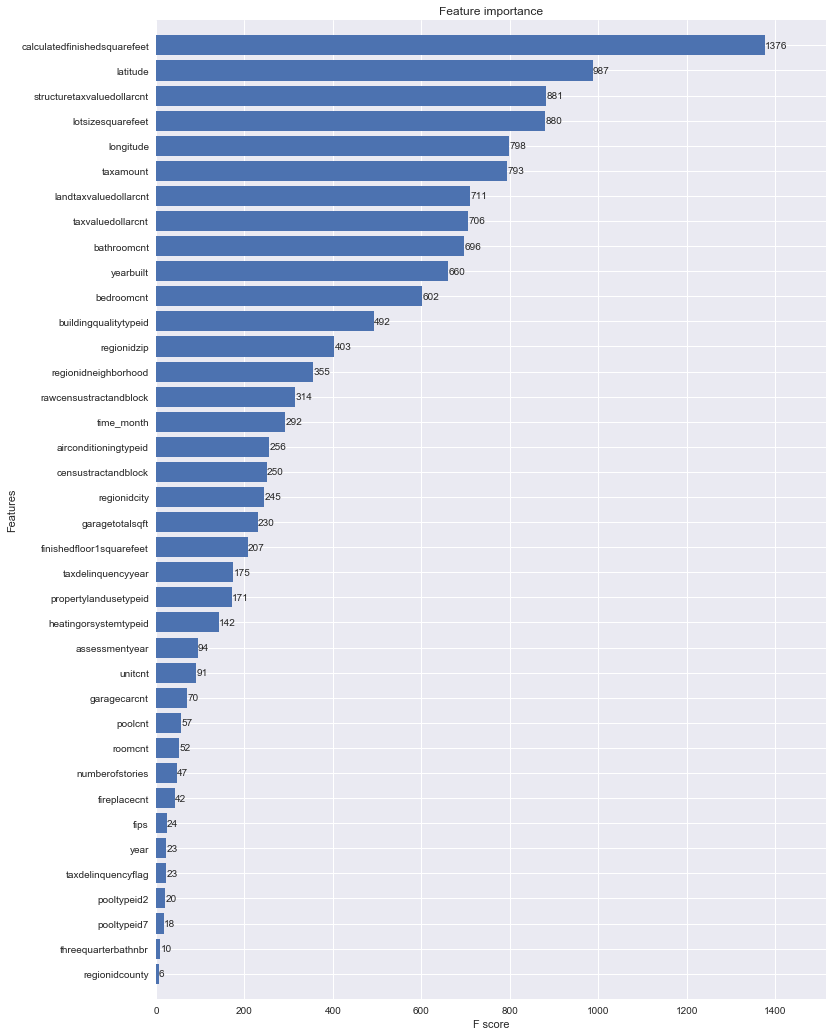

In [250]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import numpy as np
import pandas as pd


# merged_16=pd.read_csv("runxghola.csv")
df_features=finmerged.copy()



df_label=finmerged['logerror'].copy()
# df_features.drop('Unnamed: 0',axis=1,inplace=True)
df_features.drop('logerror',axis=1,inplace=True)
df_features.drop('transactiondate',axis=1,inplace=True)
df_features.drop('propertycountylandusecode',axis=1,inplace=True)
df_features.drop('propertyzoningdesc',axis=1,inplace=True)
df_features.drop('parcelid',axis=1,inplace=True)


# print(df_features)
# print(df_label)
train_y=df_label.values



xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'silent': 1,
    'seed' : 0
}
dtrain = xgb.DMatrix(df_features, train_y, feature_names=df_features.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=150)

# # plot the important features 
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, height=0.8, ax=ax)
plt.show()

#### Relation between Fire Place Count and Fire Place Flag

In the below segment we see that there are places where fireplaceflag is true but no count is present. So we replace places where the flag is true by 1 and fill rest of fireplacecnt by 0 and drop fireplaceflag. Since, fireplace flag is not considered in the XGBoost feature selection we habe dropped the column.

In [53]:
print(finmerged['fireplacecnt'].isnull().sum())
print(finmerged['fireplacecnt'].value_counts())

print(finmerged['fireplaceflag'].value_counts())
print(finmerged['fireplaceflag'].isnull().sum())
finmerged[['fireplacecnt','fireplaceflag']]
#so we see over here that their are places where fireplaceflag is true but no count is present
#so we replace places where the flas is true by 1 and fill rest of fireplacecnt by 0 and drop fireplaceflag
finmerged.loc[(finmerged['fireplaceflag']==1),'fireplacecnt']= 1
print(finmerged['fireplacecnt'].isnull().sum())
finmerged['fireplacecnt'].fillna(0,inplace=True)
#let's drop this column as it is not considered in the xgboost model because it had too many missig values
finmerged.drop(['fireplaceflag'],axis=1,inplace=True)

149958
1.0    15183
2.0     2104
3.0      547
4.0       56
5.0        6
Name: fireplacecnt, dtype: int64
1.0    394
Name: fireplaceflag, dtype: int64
167460
149564


#### Handle Missing Values for Tax Delinquency flag

We have assumed nulls as 0's ,in other words the flag is not valid for the particular parcelid. We have converted Y's to 1.



In [54]:
print(finmerged['taxdelinquencyflag'].value_counts())
print(finmerged['taxdelinquencyflag'].isnull().sum())
#assuming null's as 0 means it's not valid for that parcelid and converting Y's to 1
finmerged['taxdelinquencyflag'].fillna(0,inplace=True)

1.0    4683
Name: taxdelinquencyflag, dtype: int64
163171


#### Garage Car Count and Garage Total Squarefeet

In this relation we observed that some records had a garage car count but did not have Garage Total Square feet. Since, the garage square feet would vary by the garage car count , we have in accordance filled in the garage square feet values which have an existing garage car count. Those properties that had a garage car count of 0 have the garage square feet values also replaced by 0

In [55]:
#lets see garagecount and garagetotalsqft
finmerged[['garagecarcnt','garagetotalsqft']]

print(finmerged['garagetotalsqft'].value_counts())
print(finmerged['garagetotalsqft'].isnull().sum())

print(finmerged['garagecarcnt'].value_counts())
print(finmerged['garagecarcnt'].isnull().sum())
finmerged['garagetotalsqft'].where(finmerged.garagecarcnt==0)
finmerged['garagecarcnt'].fillna(0,inplace=True)
finmerged.loc[(finmerged['garagecarcnt']==0),'garagetotalsqft']= 0
finmerged['garagetotalsqft']=finmerged.groupby(['garagecarcnt'])['garagetotalsqft'].apply(lambda x: x.fillna(x.mean()))


0.0       16909
400.0      1758
441.0      1474
462.0      1388
360.0      1383
460.0      1269
440.0      1235
420.0      1179
483.0       907
480.0       636
430.0       535
504.0       488
437.0       467
451.0       432
456.0       383
484.0       291
471.0       274
396.0       251
380.0       238
630.0       223
600.0       212
472.0       212
506.0       210
410.0       197
427.0       193
450.0       190
528.0       190
588.0       185
560.0       184
444.0       183
          ...  
1098.0        1
1012.0        1
1831.0        1
1543.0        1
2720.0        1
1116.0        1
1247.0        1
1088.0        1
265.0         1
944.0         1
981.0         1
869.0         1
927.0         1
1239.0        1
1090.0        1
1234.0        1
1245.0        1
1761.0        1
1686.0        1
1251.0        1
1400.0        1
979.0         1
1176.0        1
287.0         1
1092.0        1
1265.0        1
925.0         1
2535.0        1
1269.0        1
1612.0        1
Name: garagetotalsqft, L

#### Missing Values in Tax Delinquency Year
If there exist a Tax Delinquicy Year is not present , there is no tax for that year hence replaced with 0.

In [56]:
print(finmerged['taxdelinquencyyear'].isnull().sum())
print(finmerged['taxdelinquencyflag'].value_counts())
finmerged['taxdelinquencyyear'].fillna(0,inplace=True)

163171
0.0    163171
1.0      4683
Name: taxdelinquencyflag, dtype: int64


#### Calculated Finished Floor Square Feet and Finished Floor1 Square Feet
Checking the correlation of finishedfloor1squarefeet and calculatedfinishedsquarefeet observe that there is a high correlation. Since, they are correlated with each other we drop finishfloor1squarefeet.

In [57]:
#we found high correlation between the finishedfloor1squarefeet and calculatedfinishedsquarefeet
#lets check it and drop if it doesnt make sense to keep it
floorrel=finmerged[['finishedfloor1squarefeet','calculatedfinishedsquarefeet','logerror']]
floorrel.corr()

,finishedfloor1squarefeet,calculatedfinishedsquarefeet,logerror
finishedfloor1squarefeet,1.000000,0.715416,0.007591
calculatedfinishedsquarefeet,0.715416,1.000000,0.039710
logerror,0.007591,0.039710,1.000000


In [58]:
#lets drop finishedfloor1squarefeet
finmerged.drop('finishedfloor1squarefeet',axis=1,inplace=True)

#### Handling missing values for structuretaxvaluedollarcnt landtaxvaluedollarcnt and taxvaluedollarcnt

Here we observed that structuretaxvaluedollarcnt+landtaxvaluedollarcnt= taxvaluedollarcnt . hence, we have replaced the missing vaues for these respectvely by subtracting the taxvaluedollarcnt.

In [59]:
print(finmerged[finmerged.structuretaxvaluedollarcnt+finmerged.landtaxvaluedollarcnt==finmerged.taxvaluedollarcnt])


        parcelid  logerror transactiondate  airconditioningtypeid  \
0       14297519  0.025595      2017-01-01                    5.0   
1       17052889  0.055619      2017-01-01                    5.0   
2       14186244  0.005383      2017-01-01                    5.0   
3       12177905 -0.103410      2017-01-01                    5.0   
4       10887214  0.006940      2017-01-01                    1.0   
5       17143294 -0.020526      2017-01-01                    5.0   
6       12095076 -0.001011      2017-01-01                    1.0   
7       12069064  0.101723      2017-01-01                    5.0   
8       12790562 -0.040966      2017-01-02                    5.0   
9       11542646 -0.036763      2017-01-02                    5.0   
10      11104527  0.005963      2017-01-02                    1.0   
11      13984101 -0.147997      2017-01-02                    5.0   
12      14705431 -0.028835      2017-01-02                    5.0   
13      13944538  0.045602      20

In [60]:
#from above we saw that structure taxvaluedollarcnt + landtaxvaluedollarcnt= taxvaluedollarcnt
#Filling in the missing structure value dollarcnt values
finmerged["structuretaxvaluedollarcnt"].fillna(finmerged.taxvaluedollarcnt-finmerged.landtaxvaluedollarcnt,inplace=True)

finmerged["landtaxvaluedollarcnt"].fillna(finmerged.taxvaluedollarcnt-finmerged.structuretaxvaluedollarcnt,inplace=True)


The rows that did not have taxvaluedollarcnt were removed as we would not be able to replace these values.

In [61]:
#lets drop the rows where we dont have a value for taxvalue dollarcnt as we wont be able to impute it
finmerged.drop(finmerged.loc[finmerged.taxvaluedollarcnt.isnull()].index,axis=0,inplace=True)


#### Handle rawcensustractandblock and censustractandblock

As mentioned in the correlation of categorical features that these 2 fields are highly correlated , we have dropped censustractandblock

In [62]:
#rawcensustractandblock and censustractandblock both are highlly correlated so removing censustractandblock because it has null values
finmerged.drop('censustractandblock',axis=1,inplace=True)

#### Handle Missing Values in Tax Amount

We have replaced missing tax amounts with the mean of the tax amounts as there is no other means of retrieving the tax amount.

In [63]:
#We wont be able to recover the taxamount lets impute the missing 11 values with mean
finmerged['taxamount'].fillna(finmerged['taxamount'].mean(),inplace=True)

#### Handle missing values of RegionidCity, RegionidNeighborhood, Regionidzip,Unitcnt,Year built, Building quality type id, Lot size squarefeet,Building quality type id

We have handled the above missing values using KNN (K Nearest Neighbors)

Regionidcity, regionidneighborhood, regionidzip,unitcnt, year built : These values have been replaced by the nearest value respectively using the latitude and longitude as the reference.

In [64]:
#this code is taken from a kaggle kernel and helps me to fill in values for regions using k nearest neighbor
#where it makes the most sense
#https://www.kaggle.com/auroralht/restoring-the-missing-geo-data

def fillna_knn( df, base, target, fraction = 1, threshold = 80, n_neighbors = 5 ):
    assert isinstance( base , list ) or isinstance( base , np.ndarray ) and isinstance( target, str ) 
    whole = [ target ] + base
    
    miss = df[target].isnull()
    notmiss = ~miss 
    nummiss = miss.sum()
    
    enc = OneHotEncoder()
    X_target = df.loc[ notmiss, whole ].sample( frac = fraction )
    
    enc.fit( X_target[ target ].unique().reshape( (-1,1) ) )
    
    Y = enc.transform( X_target[ target ].values.reshape((-1,1)) ).toarray()
    X = X_target[ base  ]
    
    print( 'fitting' )
    n_neighbors = n_neighbors
    clf = neighbors.KNeighborsClassifier( n_neighbors, weights = 'uniform' )
    clf.fit( X, Y )
    
    print( 'the shape of active features: ' ,enc.active_features_.shape )
    
    print( 'predicting' )
    Z = clf.predict(df.loc[miss, base])
    
    numunperdicted = Z[:,0].sum()
    if numunperdicted / nummiss *100 < threshold :
        print( 'writing result to df' )    
        df.loc[ miss, target ]  = np.dot( Z , enc.active_features_ )
        print( 'num of unperdictable data: ', numunperdicted )
        return enc
    else:
        print( 'out of threshold: {}% > {}%'.format( numunperdicted / nummiss *100 , threshold ) )

#function to deal with variables that are actually string/categories
def zoningcode2int( df, target ):
    storenull = df[ target ].isnull()
    enc = LabelEncoder( )
    df[ target ] = df[ target ].astype( str )

    print('fit and transform')
    df[ target ]= enc.fit_transform( df[ target ].values )
    print( 'num of categories: ', enc.classes_.shape  )
    df.loc[ storenull, target ] = np.nan
    print('recover the nan value')
    return enc


In [65]:
#regionidcity, regionidneighborhood & regionidzip - assume it is the same as the nereast property. 
#As mentioned above, this is ok if there's a property very nearby to the one with missing values 
#(I leave it up to the reader to check if this is the case!)
fillna_knn( df = finmerged,
                  base = [ 'latitude', 'longitude' ] ,
                  target = 'regionidcity', fraction = 0.3, n_neighbors = 5 )

fillna_knn( df = finmerged,
                  base = [ 'latitude', 'longitude' ] ,
                  target = 'regionidneighborhood', fraction = 0.3, n_neighbors = 5 )

fillna_knn( df = finmerged,
                  base = [ 'latitude', 'longitude' ] ,
                  target = 'regionidzip', fraction = 0.3, n_neighbors = 5 )

fillna_knn( df = finmerged,
                  base = [ 'latitude', 'longitude' ] ,
                  target = 'unitcnt', fraction = 0.3, n_neighbors = 5 )

#yearbuilt - assume it is the same as the nearest property. This assumes properties all near to each other were built around the same time
fillna_knn( df = finmerged,
                  base = [ 'latitude', 'longitude' ] ,
                  target = 'yearbuilt', fraction = 0.3, n_neighbors = 5 )



fitting
the shape of active features:  (177,)
predicting
writing result to df
num of unperdictable data:  2.0
fitting
the shape of active features:  (457,)
predicting
writing result to df
num of unperdictable data:  314.0
fitting
the shape of active features:  (387,)
predicting
writing result to df
num of unperdictable data:  0.0
fitting
the shape of active features:  (5,)
predicting
writing result to df
num of unperdictable data:  9959.0
fitting
the shape of active features:  (130,)
predicting
writing result to df
num of unperdictable data:  0.0


OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

We have replaced the lotsizesquarefeet with the  lot size of property closest geographically

In [66]:
#lot size square feet - not sure what to do about this one. Lets use nearest neighbours. Assume it has same lot size as property closest to it
fillna_knn( df = finmerged,
                  base = [ 'latitude', 'longitude' ] ,
                  target = 'lotsizesquarefeet', fraction = 0.1, n_neighbors = 1 )



fitting
the shape of active features:  (8322,)
predicting
writing result to df
num of unperdictable data:  6.0


OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

We have replaced the buildingqualitytypeid with the buildingqualitytypeid of property closest geographically

In [67]:
#yearbuilt - assume it is the same as the nearest property. This assumes properties all near to each other were built around the same time
fillna_knn( df = finmerged,
                  base = [ 'latitude', 'longitude' ] ,
                  target = 'buildingqualitytypeid', fraction = 0.3, n_neighbors = 5 )


fitting
the shape of active features:  (12,)
predicting
writing result to df
num of unperdictable data:  1105.0


OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

We have replaced the propertyzoningdesc with the propertyzoningdesc of property closest geographically

In [68]:
zoningcode2int( df = finmerged,
                            target = 'propertyzoningdesc' )

fillna_knn( df = finmerged,
                  base = [ 'latitude', 'longitude' ] ,
                  target = 'propertyzoningdesc', fraction = 0.3, n_neighbors = 5 )


fit and transform
num of categories:  (2347,)
recover the nan value
fitting
the shape of active features:  (1649,)
predicting
writing result to df
num of unperdictable data:  0.0


OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [69]:
zoningcode2int( df = finmerged,
                            target = 'propertycountylandusecode' )

fit and transform
num of categories:  (91,)
recover the nan value


LabelEncoder()

#### Calculated Finished Squarefeet

Missing Values of Calculated Finished SquareFeet are replaced by the mean.

In [70]:
#lets fill the missing 100 values in clculatedfinishedsqft with mean
finmerged['calculatedfinishedsquarefeet'].fillna(finmerged['calculatedfinishedsquarefeet'].mean(),inplace=True)

#### Handling Missing Values for Heating System ID

After research , we reached the conclusion that houses generally have central heating system hence, hence all missing values have been replaced by id 2.

In [71]:
#lets fill the heating systemid with the max occuring value which is 2 as most houses usually have central heating system
finmerged['heatingorsystemtypeid'].fillna(2,inplace=True)

#### Handling StoryType ID
Since, the storytype id did not get considered in the XG Bost feature selection , we dropped the story typeid.

In [72]:
#lets drop the storytypeid as it is not an important feature from the xgboost analysis
finmerged.drop('numberofstories',axis=1,inplace=True)

We now check for missung value count for each feature under consideration

In [73]:
finmerged.isnull().sum()

parcelid                        0
logerror                        0
transactiondate                 0
airconditioningtypeid           0
bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedfinishedsquarefeet    0
fips                            0
fireplacecnt                    0
garagecarcnt                    0
garagetotalsqft                 0
heatingorsystemtypeid           0
latitude                        0
longitude                       0
lotsizesquarefeet               0
poolcnt                         0
pooltypeid2                     0
pooltypeid7                     0
propertycountylandusecode       1
propertylandusetypeid           0
propertyzoningdesc              0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidneighborhood            0
regionidzip                     0
roomcnt                         0
threequarterbathnbr             0
unitcnt       

Now, we have dropped the records with any occurence of a missing values

In [74]:
#now lets drop any rows that have any missing values in it
finmerged.dropna(axis=0,how="any",inplace=True)

In [75]:
finmerged.isnull().sum()

parcelid                        0
logerror                        0
transactiondate                 0
airconditioningtypeid           0
bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedfinishedsquarefeet    0
fips                            0
fireplacecnt                    0
garagecarcnt                    0
garagetotalsqft                 0
heatingorsystemtypeid           0
latitude                        0
longitude                       0
lotsizesquarefeet               0
poolcnt                         0
pooltypeid2                     0
pooltypeid7                     0
propertycountylandusecode       0
propertylandusetypeid           0
propertyzoningdesc              0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidneighborhood            0
regionidzip                     0
roomcnt                         0
threequarterbathnbr             0
unitcnt       

## Feature Selection

After cleaning the data and handling missing values we used Baruta, XG Boost and Random Forest Regressor Feature Selection to select the features

#### Feature Selection using Baruta
We selected the Baruta Package as it works well for Regression. It takes into account multi variate relationships. It only considers those variables which have higher importance, than that of the randomised variables. We observe that Baruta ran 100 iterations before it gave the list of feature selection. It provides a list of Tentative, Confirmed, Rejected number of features and then lists the feature importance based on the feature index

![image.png](attachment:image.png)


In [193]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from boruta import boruta_py


# merged_16=pd.read_csv("data28.csv")
#print(merged_16)
df_features=finmerged.copy()
df_label=finmerged['logerror'].copy()
# df_features.drop('Unnamed: 0',axis=1,inplace=True)
df_features.drop('transactiondate',axis=1,inplace=True)
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from boruta import boruta_py


# merged_16=pd.read_csv("data28.csv")
#print(merged_16)
df_features=finmerged.copy()
df_label=finmerged['logerror'].copy()
# df_features.drop('Unnamed: 0',axis=1,inplace=True)
df_features.drop('transactiondate',axis=1,inplace=True)
df_features.drop('parcelid',axis=1,inplace=True)


# load X and y
X = df_features.values
y = df_label.values
 
# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels
forest = RandomForestRegressor(n_estimators=20,oob_score=True,n_jobs=-1,random_state=42)
 
# define Boruta feature selection method
feat_selector = boruta_py.BorutaPy(forest, n_estimators='auto', verbose=2)
 
# find all relevant features
feat_selector.fit(X, y)
 
# check selected features
print(feat_selector.support_)
 
# check ranking of features
print(feat_selector.ranking_)
 
# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(X)



# load X and y
X = df_features.values
y = df_label.values
 
# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels
forest = RandomForestRegressor(n_estimators=20,oob_score=True,n_jobs=-1,random_state=42)
 
# define Boruta feature selection method
feat_selector = boruta_py.BorutaPy(forest, n_estimators='auto', verbose=2)
 
# find all relevant features
feat_selector.fit(X, y)
 
# check selected features
print(feat_selector.support_)
 
# check ranking of features
print(feat_selector.ranking_)
 
# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(X)



Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	38
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	38
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	38
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	38
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	38
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	38
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	38
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	30


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	9 / 100
Confirmed: 	1
Tentative: 	7
Rejected: 	30


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	10 / 100
Confirmed: 	1
Tentative: 	7
Rejected: 	30


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	11 / 100
Confirmed: 	1
Tentative: 	7
Rejected: 	30


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	12 / 100
Confirmed: 	1
Tentative: 	5
Rejected: 	32


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	13 / 100
Confirmed: 	1
Tentative: 	5
Rejected: 	32


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	14 / 100
Confirmed: 	1
Tentative: 	5
Rejected: 	32


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	15 / 100
Confirmed: 	1
Tentative: 	5
Rejected: 	32


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	16 / 100
Confirmed: 	1
Tentative: 	5
Rejected: 	32


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	17 / 100
Confirmed: 	1
Tentative: 	5
Rejected: 	32


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	18 / 100
Confirmed: 	1
Tentative: 	5
Rejected: 	32


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	19 / 100
Confirmed: 	1
Tentative: 	5
Rejected: 	32


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	20 / 100
Confirmed: 	1
Tentative: 	5
Rejected: 	32


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	21 / 100
Confirmed: 	1
Tentative: 	5
Rejected: 	32


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	22 / 100
Confirmed: 	1
Tentative: 	5
Rejected: 	32


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	23 / 100
Confirmed: 	1
Tentative: 	5
Rejected: 	32


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	24 / 100
Confirmed: 	1
Tentative: 	5
Rejected: 	32


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	25 / 100
Confirmed: 	1
Tentative: 	5
Rejected: 	32


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	26 / 100
Confirmed: 	1
Tentative: 	5
Rejected: 	32


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	27 / 100
Confirmed: 	1
Tentative: 	5
Rejected: 	32


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	28 / 100
Confirmed: 	1
Tentative: 	5
Rejected: 	32


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	29 / 100
Confirmed: 	1
Tentative: 	5
Rejected: 	32


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	30 / 100
Confirmed: 	1
Tentative: 	5
Rejected: 	32


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	31 / 100
Confirmed: 	1
Tentative: 	5
Rejected: 	32


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	32 / 100
Confirmed: 	1
Tentative: 	5
Rejected: 	32


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	33 / 100
Confirmed: 	1
Tentative: 	5
Rejected: 	32


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	34 / 100
Confirmed: 	1
Tentative: 	5
Rejected: 	32


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	35 / 100
Confirmed: 	1
Tentative: 	5
Rejected: 	32


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	36 / 100
Confirmed: 	1
Tentative: 	5
Rejected: 	32


C:\Users\jaini\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	37 / 100
Confirmed: 	1
Tentative: 	5
Rejected: 	32


C:\Users\jaini\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	38 / 100
Confirmed: 	1
Tentative: 	5
Rejected: 	32


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	39 / 100
Confirmed: 	1
Tentative: 	5
Rejected: 	32


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	40 / 100
Confirmed: 	1
Tentative: 	5
Rejected: 	32


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	41 / 100
Confirmed: 	1
Tentative: 	5
Rejected: 	32


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	42 / 100
Confirmed: 	1
Tentative: 	5
Rejected: 	32


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	43 / 100
Confirmed: 	1
Tentative: 	5
Rejected: 	32


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	44 / 100
Confirmed: 	1
Tentative: 	5
Rejected: 	32


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	45 / 100
Confirmed: 	1
Tentative: 	5
Rejected: 	32


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	46 / 100
Confirmed: 	1
Tentative: 	5
Rejected: 	32


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	47 / 100
Confirmed: 	1
Tentative: 	5
Rejected: 	32


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	48 / 100
Confirmed: 	1
Tentative: 	5
Rejected: 	32


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	49 / 100
Confirmed: 	1
Tentative: 	5
Rejected: 	32


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	50 / 100
Confirmed: 	1
Tentative: 	5
Rejected: 	32


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	51 / 100
Confirmed: 	1
Tentative: 	5
Rejected: 	32


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	52 / 100
Confirmed: 	1
Tentative: 	5
Rejected: 	32


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	53 / 100
Confirmed: 	1
Tentative: 	5
Rejected: 	32


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	54 / 100
Confirmed: 	1
Tentative: 	4
Rejected: 	33


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	55 / 100
Confirmed: 	1
Tentative: 	4
Rejected: 	33


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	56 / 100
Confirmed: 	1
Tentative: 	4
Rejected: 	33


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	57 / 100
Confirmed: 	1
Tentative: 	4
Rejected: 	33


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	58 / 100
Confirmed: 	1
Tentative: 	4
Rejected: 	33


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	59 / 100
Confirmed: 	1
Tentative: 	4
Rejected: 	33


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	60 / 100
Confirmed: 	1
Tentative: 	4
Rejected: 	33


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	61 / 100
Confirmed: 	1
Tentative: 	4
Rejected: 	33


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	62 / 100
Confirmed: 	1
Tentative: 	4
Rejected: 	33


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	63 / 100
Confirmed: 	1
Tentative: 	4
Rejected: 	33


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	64 / 100
Confirmed: 	1
Tentative: 	4
Rejected: 	33


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	65 / 100
Confirmed: 	1
Tentative: 	4
Rejected: 	33


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	66 / 100
Confirmed: 	1
Tentative: 	4
Rejected: 	33


C:\Users\jaini\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	67 / 100
Confirmed: 	1
Tentative: 	4
Rejected: 	33


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	68 / 100
Confirmed: 	1
Tentative: 	4
Rejected: 	33


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	69 / 100
Confirmed: 	1
Tentative: 	4
Rejected: 	33


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	70 / 100
Confirmed: 	1
Tentative: 	4
Rejected: 	33


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	71 / 100
Confirmed: 	1
Tentative: 	4
Rejected: 	33


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	72 / 100
Confirmed: 	1
Tentative: 	4
Rejected: 	33


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	73 / 100
Confirmed: 	1
Tentative: 	4
Rejected: 	33


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	74 / 100
Confirmed: 	1
Tentative: 	4
Rejected: 	33


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	75 / 100
Confirmed: 	1
Tentative: 	4
Rejected: 	33


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	76 / 100
Confirmed: 	1
Tentative: 	4
Rejected: 	33


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	77 / 100
Confirmed: 	1
Tentative: 	3
Rejected: 	34


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	78 / 100
Confirmed: 	1
Tentative: 	3
Rejected: 	34


C:\Users\jaini\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	79 / 100
Confirmed: 	1
Tentative: 	3
Rejected: 	34


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	80 / 100
Confirmed: 	1
Tentative: 	3
Rejected: 	34


C:\Users\jaini\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	81 / 100
Confirmed: 	1
Tentative: 	3
Rejected: 	34


C:\Users\jaini\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	82 / 100
Confirmed: 	1
Tentative: 	3
Rejected: 	34


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	83 / 100
Confirmed: 	1
Tentative: 	3
Rejected: 	34


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	84 / 100
Confirmed: 	1
Tentative: 	3
Rejected: 	34


C:\Users\jaini\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	85 / 100
Confirmed: 	1
Tentative: 	3
Rejected: 	34


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	86 / 100
Confirmed: 	1
Tentative: 	3
Rejected: 	34


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	87 / 100
Confirmed: 	1
Tentative: 	3
Rejected: 	34


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	88 / 100
Confirmed: 	1
Tentative: 	3
Rejected: 	34


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	89 / 100
Confirmed: 	1
Tentative: 	3
Rejected: 	34


C:\Users\jaini\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	90 / 100
Confirmed: 	1
Tentative: 	3
Rejected: 	34


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	91 / 100
Confirmed: 	1
Tentative: 	3
Rejected: 	34


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	92 / 100
Confirmed: 	1
Tentative: 	3
Rejected: 	34


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	93 / 100
Confirmed: 	1
Tentative: 	3
Rejected: 	34


C:\Users\jaini\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	94 / 100
Confirmed: 	1
Tentative: 	3
Rejected: 	34


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	95 / 100
Confirmed: 	1
Tentative: 	3
Rejected: 	34


C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	96 / 100
Confirmed: 	1
Tentative: 	3
Rejected: 	34


C:\Users\jaini\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	97 / 100
Confirmed: 	1
Tentative: 	3
Rejected: 	34


C:\Users\jaini\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	98 / 100
Confirmed: 	1
Tentative: 	3
Rejected: 	34


C:\Users\jaini\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\jaini\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	99 / 100
Confirmed: 	1
Tentative: 	3
Rejected: 	34


BorutaPy finished running.

Iteration: 	100 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	34
[ True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False]
[ 1 13 16  8 10 12 27 33 31 32 29 14 17  6 24 36 22 20  9 19  3 18 26 11  5
 28 34 30  7  3  2 24  3 15 36 36 23 20]
Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	38
Rejected: 	0


KeyboardInterrupt: 

In [ ]:
#now run all the algorithms till this point


#### Feature Selection with XG Boost

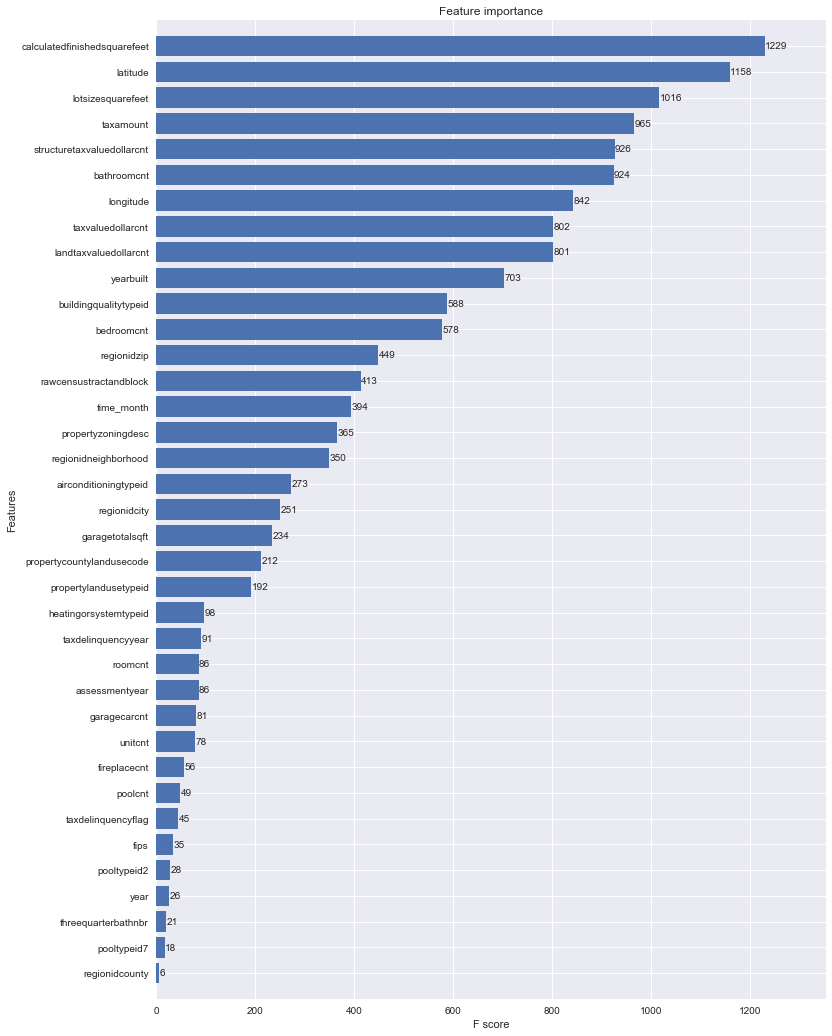

In [76]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import numpy as np
import pandas as pd


# merged_16=pd.read_csv("runxghola.csv")
df_features=finmerged.copy()
df_label=finmerged['logerror'].copy()
# df_features.drop('Unnamed: 0',axis=1,inplace=True)
df_features.drop('logerror',axis=1,inplace=True)
df_features.drop('transactiondate',axis=1,inplace=True)
# df_features.drop('propertycountylandusecode',axis=1,inplace=True)
# df_features.drop('propertyzoningdesc',axis=1,inplace=True)
df_features.drop('parcelid',axis=1,inplace=True)



# print(df_features)
# print(df_label)
train_y=df_label.values



# print(df_train.columns.values)

# feat_names = df_train.columns.values

# for c in df_train.columns:
#     if df_train[c].dtype == 'object':
#         lbl = LabelEncoder()
#         lbl.fit(list(df_train[c].values))
#         df_train[c] = lbl.transform(list(df_train[c].values))

#import
xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'silent': 1,
    'seed' : 0
}
dtrain = xgb.DMatrix(df_features, train_y, feature_names=df_features.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=150)

# # plot the important features 
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, height=0.8, ax=ax)
plt.show()

#### Feature Selection Using Random Forest Regressor

The Random Forest Regressor also allows feature selection which presents the weights it has assigned to each featue along with the feature names as well.

In [83]:
#using randomforest regressor to find the importance of features
from sklearn.ensemble import RandomForestRegressor
merged_feature=finmerged.copy()
merged_feature.drop('logerror',axis=1,inplace=True)

# merged_feature.drop('propertyzoningdesc',axis=1,inplace=True)

# merged_feature.drop('propertycountylandusecode',axis=1,inplace=True)

merged_feature.drop('transactiondate',axis=1,inplace=True)
merged_target=finmerged['logerror'].copy()
feat_labels=merged_feature.columns[1:]
X_train, X_test, y_train, y_test = train_test_split(merged_feature, merged_target, test_size = 0.3, random_state=49)
forest=RandomForestRegressor(n_estimators=200,random_state=0,n_jobs=-1)
forest.fit(X_train,y_train)
importances=forest.feature_importances_
indices=np.argsort(importances)[::-1]
print(importances)


[ 0.07150822  0.00563546  0.01619884  0.01898599  0.01597767  0.07368307
  0.00070454  0.00239797  0.00304912  0.01378938  0.00611787  0.07497962
  0.06665795  0.07602634  0.00300241  0.00084168  0.00301267  0.01090028
  0.00764331  0.02993918  0.02920757  0.01785929  0.00100698  0.02555499
  0.03570554  0.0063539   0.00259697  0.0066659   0.05038833  0.07478324
  0.05905211  0.00504317  0.06809869  0.06586659  0.00208433  0.00631924
  0.00505689  0.0373047 ]


### Result after Feature Selection 

We observed that features suggested by XGBoost, Baruta and Random Forest Regressor are along the same lines as our analysis
the 'finmerged' dataframe now finally consists of the following features :

In [84]:
finmerged.columns

Index(['parcelid', 'logerror', 'transactiondate', 'airconditioningtypeid',
       'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedfinishedsquarefeet', 'fips', 'fireplacecnt', 'garagecarcnt',
       'garagetotalsqft', 'heatingorsystemtypeid', 'latitude', 'longitude',
       'lotsizesquarefeet', 'poolcnt', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'threequarterbathnbr', 'unitcnt', 'yearbuilt',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear',
       'landtaxvaluedollarcnt', 'taxamount', 'taxdelinquencyflag',
       'taxdelinquencyyear', 'year', 'time_month'],
      dtype='object')

## Prediction Models

The approach used for model prediction involves trying the model with different sets of features. Our trials are as follows :

Exp 1. Use of set of features (feature list present in superfinaly.csv). These features incorporate approximately all features selected by XG Boost. We have run this on Linear Regression, Random Forest and Neural Networks. We have tried to fine tune the model by the different tuning parameters.

Exp 2. Random forest has also been implemented on the clean data present in this notebook

Exp 3. We have run the Random Forest Algorithm when Categorical Values as dummy variables.

     1. Categorical Values as dummy Variables (values less than 100)

     2. We ran the Random Forest Algorithm with Categorical Values having values greater than 1000
     
EXP 4: Ran the model without Training and Testing split

The prediction models for the set 1 has been executed in a different Jupyter NoteBook namely Prediction Models as this was computationally intensive . The code is also present below and for the reader's reference we will also attach snapshots. For further details please refer the Model Prediction Notebook.

### Use of set of features

In [ ]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
withoutfeaturesselection = pd.io.parsers.read_csv("superfinaly.csv",header = 0)

#### Multiple Linear Regression

The multiple linear regression is present as below





![Linear%20Regression.JPG](attachment:Linear%20Regression.JPG)






In [ ]:
#Multple Linear Regression Case 1:
reg=linear_model.LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(df_features,df_label,test_size=0.3,random_state=4)
reg.fit(x_train,y_train)
predicted_train=reg.predict(x_train)
predicted_test=reg.predict(x_test)
print("Testing mean absolute error : %f" %mean_absolute_error(y_test,predicted_test))
print("Training mean absolute error: %f" %mean_absolute_error(y_train,predicted_train))
rmse=np.sqrt(mean_squared_error(y_test,predicted_test))
print("RMSE Value")
print(rmse)

#### Random Forest

The Random Forest algorithm with these features was run in 2 diffrent trials. The Case 1 Code is as below. The screen shots of the results are present below the code block. In the first trial we used diffrent max_features namely "auto","sqrt" and "log 2". The code for case 1 is presented as below

In [ ]:
#Random Forest Regressor Case 1:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
df_features=np.array(df_features)
df_label=np.array(df_label)
df_label=df_label.ravel()
df_features=df_features.tolist()
df_features = StandardScaler().fit_transform(df_features)
x_train,x_test,y_train,y_test=train_test_split(df_features,df_label,test_size=0.3,random_state=4)
max_features=['auto','sqrt','log2']
for m in max_features:
    model=RandomForestRegressor(n_estimators=100,max_features=m,oob_score=True,n_jobs=-1,random_state=50,min_samples_leaf=10)
    model.fit(x_train,y_train)
    predicted_train=model.predict(x_train)
    predicted_test=model.predict(x_test)
    print(m)
    print("Testing mean absolute error : %f" %mean_absolute_error(y_test,predicted_test))
    print("Training mean absolute error: %f" %mean_absolute_error(y_train,predicted_train))
    rmse=np.sqrt(mean_squared_error(y_test,predicted_test))
    print("RMSE Value")
    print(rmse)



![image.png](attachment:image.png)

### Result Set

![image.png](attachment:image.png)

#### Random Forest Case 2

Next in case 2 we used various tuning parameters and check each of the combinations. We tried the following tuning parameters max_features - "auto","sqrt" and "log 2"
n_estimators - 50,100,150
min_samples_leaf- 10,20,30

Each of these combination were tried as below. The screen shots of the results are present below the case 2 code block. 

In [ ]:
#Random Forest Regressor Case 2:
from sklearn.ensemble import RandomForestRegressor

max_features=['auto','sqrt','log2']
n_estimators=[50,100,150]
min_samples_leaf=[10,20,30]
for x in n_estimators:
    for y in min_samples_leaf:
        for z in max_features:
            model=RandomForestRegressor(n_estimators=x,max_features=z,oob_score=True,n_jobs=-1,random_state=50,min_samples_leaf=y)
            model.fit(x_train,y_train)
            predicted_train=model.predict(x_train)
            predicted_test=model.predict(x_test)
            print("Tuning Combination") 
            print(x," ",y ," ", z,"")
            print("Testing mean absolute error : %f" % mean_absolute_error(y_test,predicted_test))
            print("Training mean absolute error: %f" %mean_absolute_error(y_train,predicted_train))
            rmse=np.sqrt(mean_squared_error(y_test,predicted_test))
            print("RMSE Value")
            print(rmse)
    

#### Result Set

![image.png](attachment:image.png)

#### Neural Network

We implemented 4 cases in using Neural Networks. 

Case 1 : Different alpha values - 1e-05,0.001,0.1,10,1000

Case 2 : Maximum Iterations - 200,400,1000

Case 3 : Combination of diffrent alpha values and maximum iterations

Case 4 : Combination of max_iter, alpha and hidden layer sizes

max_iter=[200,400,1000]
alpha =[1e-05,0.001,0.1,10,1000]
hidden_layer_sizes = [100,300,1000]

The code is followed by the snapshot of the results


#### Case 1 - Different Alpha Values

In [ ]:
#Neural Network Case 1:
#List of Alpha Values
from sklearn.neural_network import MLPRegressor
df_features=np.array(df_features)
df_label=np.array(df_label)
df_label=df_label.ravel()
df_features=df_features.tolist()
df_features = StandardScaler().fit_transform(df_features)
x_train,x_test,y_train,y_test=train_test_split(df_features,df_label,test_size=0.3,random_state=4)
hidden_layers=[]
alpha=[1e-05,0.001,0.1,10,1000]


for a in alpha:  
    nn = MLPRegressor(hidden_layer_sizes=(100,),  activation='relu', solver='adam', alpha=a,batch_size='auto',learning_rate='constant',
    learning_rate_init=0.001, max_iter=1000, shuffle=True,random_state=50, tol=0.0001, verbose=False, warm_start=False,
    early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    n = nn.fit(x_train,y_train)
    predicted_trainnn=n.predict(x_train)
    predicted_testnn=n.predict(x_test)
    print("Testing mean absolute error : %f" % mean_absolute_error(y_test,predicted_test))
    print("training mean absolute error: %f"% mean_absolute_error(y_train,predicted_train))
    rmse=np.sqrt(mean_squared_error(y_test,predicted_test))
    print("RMSE Value")
    print(rmse)

    

### Result Set

![image.png](attachment:image.png)

#### Neural Net Case 2

In [ ]:
#Neural Network Case 2 list of Number of max_iterations :
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
df_features=np.array(df_features)
df_label=np.array(df_label)
df_label=df_label.ravel()
df_features=df_features.tolist()
df_features = StandardScaler().fit_transform(df_features)

x_train,x_test,y_train,y_test=train_test_split(df_features,df_label,test_size=0.3,random_state=4)
max_iter=[200,400,1000]


for m in max_iter:
    nn = MLPRegressor(hidden_layer_sizes=(100,),  activation='relu', solver='adam', alpha=1e-05,batch_size='auto',learning_rate='constant',
        learning_rate_init=0.001, max_iter=m, shuffle=True,random_state=50, tol=0.0001, verbose=False, warm_start=False,
        early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    n = nn.fit(x_train,y_train)
    predicted_trainnn=n.predict(x_train)
    predicted_testnn=n.predict(x_test)
    n.n_layers_
    print(m, end=" ")
    print("Testing mean absolute error : %f"  % mean_absolute_error(y_test,predicted_test))
    print("training mean absolute error: %f" % mean_absolute_error(y_train,predicted_train))
    rmse=np.sqrt(mean_squared_error(y_test,predicted_test))
    print("RMSE Value")
    print(rmse)



### Result Set

![image.png](attachment:image.png)


#### Neural Net Case 3

In [ ]:
#Neural Network Case 3 list of Number of max_iterations and alpha values:

max_iter=[200,400,1000]
alpha =[1e-05,0.001,0.1,10,1000]
#i = [100,300,1000]

#for i in hidden_layer_sizes:
for m in max_iter:
    for a in alpha:
        nn = MLPRegressor(hidden_layer_sizes=(100,),  activation='relu', solver='adam',alpha=a,batch_size='auto',learning_rate='constant',
        learning_rate_init=0.001, max_iter=m, shuffle=True,random_state=50, tol=0.0001, verbose=False, warm_start=False,
        early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
        n = nn.fit(x_train,y_train)
        predicted_trainnn=n.predict(x_train)
        predicted_testnn=n.predict(x_test)
         
        print(a," ",m, end=" ")
        print("Testing mean absolute error : %f"  % mean_absolute_error(y_test,predicted_test))
        print("training mean absolute error: %f" % mean_absolute_error(y_train,predicted_train))
        rmse=np.sqrt(mean_squared_error(y_test,predicted_test))
        print("RMSE Value")
        print(rmse)


### Result Set
![image.png](attachment:image.png)

#### Neural Net Case 4

In [ ]:
#Neural Network Case 4 ,ax_iter,aplha,hidden_layer_size:

max_iter=[200,400,1000]
alpha =[1e-05,0.001,0.1,10,1000]
hidden_layer_sizes = [100,300,1000]

for i in hidden_layer_sizes:
    for m in max_iter:
        for a in alpha:
            nn = MLPRegressor(hidden_layer_sizes=(i,),  activation='relu', solver='adam',alpha=a,batch_size='auto',learning_rate='constant',
            learning_rate_init=0.001, max_iter=m, shuffle=True,random_state=50, tol=0.0001, verbose=False, warm_start=False,
            early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
            n = nn.fit(x_train,y_train)
            predicted_trainnn=n.predict(x_train)
            predicted_testnn=n.predict(x_test)
         
            print(i," ",a," ",m, end=" ")
            print("Testing mean absolute error : %f"  % mean_absolute_error(y_test,predicted_test))
            print("training mean absolute error: %f" % mean_absolute_error(y_train,predicted_train))
            rmse=np.sqrt(mean_squared_error(y_test,predicted_test))
            print("RMSE Value")
            print(rmse)
            

### Result Set

![image.png](attachment:image.png)

#### Random forest on the Cleaned Data

We also ran the Random Forest Regressor on the cleaned data consisting of features suggested by XGBoost. Due to computational over head this was run on another PC. Please find below the screenshots and results. We will attach the file for refernce 

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import pandas as pd
import random
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler


df_features=pd.read_csv("zillowdata.csv")

df_features.drop('parcelid',axis=1,inplace=True)
df_features.drop('transactiondate',axis=1,inplace=True)

df_label=df_features['logerror'].copy()
df_features.drop('logerror',axis=1,inplace=True)

x_train,x_test,y_train,y_test=train_test_split(df_features,df_label,test_size=0.3,random_state=4)

max_features=['sqrt','log2',0.5,'auto']
n_estimators=[100,200]
min_samples_leaf=[5,10,20,30]
for y in n_estimators:
    for x in max_features:
        for z in min_samples_leaf:
            model=RandomForestRegressor(n_estimators=y,max_features=x,oob_score=True,n_jobs=-1,random_state=50,min_samples_leaf=z)
            model.fit(x_train,y_train)
            predicted_train=model.predict(x_train)
            predicted_test=model.predict(x_test)
            print("max_features",x,"n_estimators ",y ,"min_sample_leaf", z,"")
            print("Testing mean absolute error : %f" % mean_absolute_error(y_test,predicted_test))
            print("Training mean absolute error: %f" %mean_absolute_error(y_train,predicted_train))
            rmse=np.sqrt(mean_squared_error(y_test,predicted_test))
            print("RMSE Value")
            print(rmse)




#### Result

![image.png](attachment:image.png)

### Prediction Models with Dummy Variables (Number of values<100)

In [85]:
onehotcopy=finmerged.copy()
t=pd.get_dummies(onehotcopy['airconditioningtypeid'],prefix='airconditioningtypeid')
onehotcopy=pd.concat([t,onehotcopy],axis=1)
print(onehotcopy.columns)
onehotcopy.drop('airconditioningtypeid',axis=1,inplace=True)

Index(['airconditioningtypeid_1.0', 'airconditioningtypeid_3.0',
       'airconditioningtypeid_5.0', 'airconditioningtypeid_9.0',
       'airconditioningtypeid_11.0', 'airconditioningtypeid_13.0', 'parcelid',
       'logerror', 'transactiondate', 'airconditioningtypeid', 'bathroomcnt',
       'bedroomcnt', 'buildingqualitytypeid', 'calculatedfinishedsquarefeet',
       'fips', 'fireplacecnt', 'garagecarcnt', 'garagetotalsqft',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'pooltypeid2', 'pooltypeid7', 'propertycountylandusecode',
       'propertylandusetypeid', 'propertyzoningdesc', 'rawcensustractandblock',
       'regionidcity', 'regionidcounty', 'regionidneighborhood', 'regionidzip',
       'roomcnt', 'threequarterbathnbr', 'unitcnt', 'yearbuilt',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear',
       'landtaxvaluedollarcnt', 'taxamount', 'taxdelinquencyflag',
       'taxdelinquencyyear', 'year', 'time_mon

In [86]:
# onehotcopy=finmerged.copy()
t=pd.get_dummies(onehotcopy['buildingqualitytypeid'],prefix='buildingqualitytypeid')
onehotcopy=pd.concat([t,onehotcopy],axis=1)
print(onehotcopy.columns)
onehotcopy.drop('buildingqualitytypeid',axis=1,inplace=True)

Index(['buildingqualitytypeid_0.0', 'buildingqualitytypeid_1.0',
       'buildingqualitytypeid_2.0', 'buildingqualitytypeid_3.0',
       'buildingqualitytypeid_4.0', 'buildingqualitytypeid_5.0',
       'buildingqualitytypeid_6.0', 'buildingqualitytypeid_7.0',
       'buildingqualitytypeid_8.0', 'buildingqualitytypeid_9.0',
       'buildingqualitytypeid_10.0', 'buildingqualitytypeid_11.0',
       'buildingqualitytypeid_12.0', 'airconditioningtypeid_1.0',
       'airconditioningtypeid_3.0', 'airconditioningtypeid_5.0',
       'airconditioningtypeid_9.0', 'airconditioningtypeid_11.0',
       'airconditioningtypeid_13.0', 'parcelid', 'logerror', 'transactiondate',
       'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedfinishedsquarefeet', 'fips', 'fireplacecnt', 'garagecarcnt',
       'garagetotalsqft', 'heatingorsystemtypeid', 'latitude', 'longitude',
       'lotsizesquarefeet', 'poolcnt', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertyl

In [87]:
# onehotcopy=finmerged.copy()
t=pd.get_dummies(onehotcopy['fips'],prefix='fips')
onehotcopy=pd.concat([t,onehotcopy],axis=1)
print(onehotcopy.columns)
onehotcopy.drop('fips',axis=1,inplace=True)

Index(['fips_6037.0', 'fips_6059.0', 'fips_6111.0',
       'buildingqualitytypeid_0.0', 'buildingqualitytypeid_1.0',
       'buildingqualitytypeid_2.0', 'buildingqualitytypeid_3.0',
       'buildingqualitytypeid_4.0', 'buildingqualitytypeid_5.0',
       'buildingqualitytypeid_6.0', 'buildingqualitytypeid_7.0',
       'buildingqualitytypeid_8.0', 'buildingqualitytypeid_9.0',
       'buildingqualitytypeid_10.0', 'buildingqualitytypeid_11.0',
       'buildingqualitytypeid_12.0', 'airconditioningtypeid_1.0',
       'airconditioningtypeid_3.0', 'airconditioningtypeid_5.0',
       'airconditioningtypeid_9.0', 'airconditioningtypeid_11.0',
       'airconditioningtypeid_13.0', 'parcelid', 'logerror', 'transactiondate',
       'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'fips',
       'fireplacecnt', 'garagecarcnt', 'garagetotalsqft',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'pooltypeid2', 'pooltypeid7', 'propertycountyland

In [88]:
# onehotcopy=finmerged.copy()
t=pd.get_dummies(onehotcopy['heatingorsystemtypeid'],prefix='heatingorsystemtypeid')
onehotcopy=pd.concat([t,onehotcopy],axis=1)
print(onehotcopy.columns)
onehotcopy.drop('heatingorsystemtypeid',axis=1,inplace=True)

Index(['heatingorsystemtypeid_1.0', 'heatingorsystemtypeid_2.0',
       'heatingorsystemtypeid_6.0', 'heatingorsystemtypeid_7.0',
       'heatingorsystemtypeid_10.0', 'heatingorsystemtypeid_11.0',
       'heatingorsystemtypeid_12.0', 'heatingorsystemtypeid_13.0',
       'heatingorsystemtypeid_14.0', 'heatingorsystemtypeid_18.0',
       'heatingorsystemtypeid_20.0', 'heatingorsystemtypeid_24.0',
       'fips_6037.0', 'fips_6059.0', 'fips_6111.0',
       'buildingqualitytypeid_0.0', 'buildingqualitytypeid_1.0',
       'buildingqualitytypeid_2.0', 'buildingqualitytypeid_3.0',
       'buildingqualitytypeid_4.0', 'buildingqualitytypeid_5.0',
       'buildingqualitytypeid_6.0', 'buildingqualitytypeid_7.0',
       'buildingqualitytypeid_8.0', 'buildingqualitytypeid_9.0',
       'buildingqualitytypeid_10.0', 'buildingqualitytypeid_11.0',
       'buildingqualitytypeid_12.0', 'airconditioningtypeid_1.0',
       'airconditioningtypeid_3.0', 'airconditioningtypeid_5.0',
       'airconditioningtype

In [89]:
t=pd.get_dummies(onehotcopy['propertycountylandusecode'],prefix='propertycountylandusecode')
onehotcopy=pd.concat([t,onehotcopy],axis=1)
print(onehotcopy.columns)
onehotcopy.drop('propertycountylandusecode',axis=1,inplace=True)

Index(['propertycountylandusecode_0.0', 'propertycountylandusecode_1.0',
       'propertycountylandusecode_2.0', 'propertycountylandusecode_3.0',
       'propertycountylandusecode_4.0', 'propertycountylandusecode_5.0',
       'propertycountylandusecode_6.0', 'propertycountylandusecode_7.0',
       'propertycountylandusecode_8.0', 'propertycountylandusecode_9.0',
       ...
       'yearbuilt', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt',
       'assessmentyear', 'landtaxvaluedollarcnt', 'taxamount',
       'taxdelinquencyflag', 'taxdelinquencyyear', 'year', 'time_month'],
      dtype='object', length=160)


In [90]:
# onehotcopy=finmerged.copy()
t=pd.get_dummies(onehotcopy['propertylandusetypeid'],prefix='propertylandusetypeid')
onehotcopy=pd.concat([t,onehotcopy],axis=1)
print(onehotcopy.columns)
onehotcopy.drop('propertylandusetypeid',axis=1,inplace=True)

Index(['propertylandusetypeid_31.0', 'propertylandusetypeid_47.0',
       'propertylandusetypeid_246.0', 'propertylandusetypeid_247.0',
       'propertylandusetypeid_248.0', 'propertylandusetypeid_260.0',
       'propertylandusetypeid_261.0', 'propertylandusetypeid_263.0',
       'propertylandusetypeid_264.0', 'propertylandusetypeid_265.0',
       ...
       'yearbuilt', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt',
       'assessmentyear', 'landtaxvaluedollarcnt', 'taxamount',
       'taxdelinquencyflag', 'taxdelinquencyyear', 'year', 'time_month'],
      dtype='object', length=173)


In [91]:
# onehotcopy=finmerged.copy()
t=pd.get_dummies(onehotcopy['regionidcounty'],prefix='regionidcounty')
onehotcopy=pd.concat([t,onehotcopy],axis=1)
print(onehotcopy.columns)
onehotcopy.drop('regionidcounty',axis=1,inplace=True)

Index(['regionidcounty_1286.0', 'regionidcounty_2061.0',
       'regionidcounty_3101.0', 'propertylandusetypeid_31.0',
       'propertylandusetypeid_47.0', 'propertylandusetypeid_246.0',
       'propertylandusetypeid_247.0', 'propertylandusetypeid_248.0',
       'propertylandusetypeid_260.0', 'propertylandusetypeid_261.0',
       ...
       'yearbuilt', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt',
       'assessmentyear', 'landtaxvaluedollarcnt', 'taxamount',
       'taxdelinquencyflag', 'taxdelinquencyyear', 'year', 'time_month'],
      dtype='object', length=175)


In [92]:
df_features=onehotcopy.copy()
df_features.drop('parcelid',axis=1,inplace=True)
df_features.drop('transactiondate',axis=1,inplace=True)
df_label=onehotcopy['logerror'].copy()
df_features.drop('logerror',axis=1,inplace=True)
print(df_features.columns)


max_features=['sqrt','log2',0.5]
n_estimators=[200]
min_samples_leaf=[15,20,25]
x_train,x_test,y_train,y_test=train_test_split(df_features,df_label,test_size=0.3,random_state=4)
for x in n_estimators:
    for y in min_samples_leaf:
        for z in max_features:
            model=RandomForestRegressor(n_estimators=x,max_features=z,oob_score=True,n_jobs=-1,random_state=50,min_samples_leaf=y)
            model.fit(x_train,y_train)
            predicted_train=model.predict(x_train)
            predicted_test=model.predict(x_test)
            print("Tuning Combination") 
            print(x," ",y ," ", z,"")
            print("Testing mean absolute error : %f" % mean_absolute_error(y_test,predicted_test))
            print("Training mean absolute error: %f" %mean_absolute_error(y_train,predicted_train))
            rmse=np.sqrt(mean_squared_error(y_test,predicted_test))
            print("RMSE Value")
            print(rmse)

Index(['regionidcounty_1286.0', 'regionidcounty_2061.0',
       'regionidcounty_3101.0', 'propertylandusetypeid_31.0',
       'propertylandusetypeid_47.0', 'propertylandusetypeid_246.0',
       'propertylandusetypeid_247.0', 'propertylandusetypeid_248.0',
       'propertylandusetypeid_260.0', 'propertylandusetypeid_261.0',
       ...
       'yearbuilt', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt',
       'assessmentyear', 'landtaxvaluedollarcnt', 'taxamount',
       'taxdelinquencyflag', 'taxdelinquencyyear', 'year', 'time_month'],
      dtype='object', length=171)
Tuning Combination
200   15   sqrt 
Testing mean absolute error : 0.068865
Training mean absolute error: 0.065087
RMSE Value
0.163348378581
Tuning Combination
200   15   log2 
Testing mean absolute error : 0.068675
Training mean absolute error: 0.067355
RMSE Value
0.163619841142
Tuning Combination
200   15   0.5 
Testing mean absolute error : 0.069618
Training mean absolute error: 0.060375
RMSE Value
0.163344184713
Tun

###  Prediction using all features that have categorical values greater than thousand

In [79]:
onehotcopy3=finmerged.copy()
t=pd.get_dummies(onehotcopy3['regionidcity'],prefix='regionidcity')
onehotcopy3=pd.concat([t,onehotcopy3],axis=1)
print(onehotcopy3.columns)
onehotcopy3.drop('regionidcity',axis=1,inplace=True)

Index(['regionidcity_0.0', 'regionidcity_3491.0', 'regionidcity_4406.0',
       'regionidcity_5465.0', 'regionidcity_5534.0', 'regionidcity_6021.0',
       'regionidcity_6285.0', 'regionidcity_6395.0', 'regionidcity_6822.0',
       'regionidcity_8384.0',
       ...
       'yearbuilt', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt',
       'assessmentyear', 'landtaxvaluedollarcnt', 'taxamount',
       'taxdelinquencyflag', 'taxdelinquencyyear', 'year', 'time_month'],
      dtype='object', length=219)


In [81]:
# onehotcopy2=finmerged.copy()
t=pd.get_dummies(onehotcopy3['regionidzip'],prefix='regionidzip')
onehotcopy3=pd.concat([t,onehotcopy3],axis=1)
print(onehotcopy3.columns)
onehotcopy3.drop('regionidzip',axis=1,inplace=True)

Index(['regionidzip_95982.0', 'regionidzip_95983.0', 'regionidzip_95984.0',
       'regionidzip_95985.0', 'regionidzip_95986.0', 'regionidzip_95987.0',
       'regionidzip_95988.0', 'regionidzip_95989.0', 'regionidzip_95991.0',
       'regionidzip_95992.0',
       ...
       'yearbuilt', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt',
       'assessmentyear', 'landtaxvaluedollarcnt', 'taxamount',
       'taxdelinquencyflag', 'taxdelinquencyyear', 'year', 'time_month'],
      dtype='object', length=608)


In [ ]:
df_features=onehotcopy3.copy()
df_features.drop('parcelid',axis=1,inplace=True)
df_features.drop('transactiondate',axis=1,inplace=True)
df_label=onehotcopy3['logerror'].copy()
df_features.drop('logerror',axis=1,inplace=True)
print(df_features.columns)


max_features=['sqrt','log2',0.5]
n_estimators=[200]
min_samples_leaf=[15,20,25]
x_train,x_test,y_train,y_test=train_test_split(df_features,df_label,test_size=0.3,random_state=4)
for x in n_estimators:
    for y in min_samples_leaf:
        for z in max_features:
            model=RandomForestRegressor(n_estimators=x,max_features=z,oob_score=True,n_jobs=-1,random_state=50,min_samples_leaf=y)
            model.fit(x_train,y_train)
            predicted_train=model.predict(x_train)
            predicted_test=model.predict(x_test)
            print("Tuning Combination") 
            print(x," ",y ," ", z,"")
            print("Testing mean absolute error : %f" % mean_absolute_error(y_test,predicted_test))
            print("Training mean absolute error: %f" %mean_absolute_error(y_train,predicted_train))
            rmse=np.sqrt(mean_squared_error(y_test,predicted_test))
            print("RMSE Value")
            print(rmse)

### Results of Exp 1

Studing the results of Exp 1 helped us reach the following conclusion :
1.	Though the values of MAE were predicted closely and in the same range, the Random Forest Regressor gave the least MAE for Testing and Training which was 0.0687 and 0.0634 closely followed by the Linear Regression Model with 0.0688 and 0.0699 MAE. Neaural Networks also had the same MAE.
2.	We observed that for this set of features the Random Forest Regressor performed the best at tuning parameters on n_estimators of 100, min_sample_leaf as 20 and max_featurs as sqrt.

The Linear Regression Model computed the fastest but with a greater MAE. The Random Forest Regressor took the longest but provided a lesser  MAE and the best accuracy. Neural Networks took the long in terms of computational time and did not provide accurate results showing very few changes in the MAE inspite of tuning the parameters.
Hence, Random forest Regressor had largest computation time but provided better accuracy.


### Results of Exp 2
 Running the Random Forest Regressor on features suggested by XGBoost, provided a similar accuracy as the previous case of MAE as 0.068 and 0.065 for testing and training respecively. The regressor performed its best at tuning parameters of n_estimator as 200, max_features as log 2 and min_samples_leaf as 30.

### Analysis of Running the Regressor with number of dummy variables 

Running the Random Forest Regressor less than 100 and greater than 1000 did not show much change in accuracy. The first iteration with less dummy variables had a MAE of 0.068 and 0.067 test and train resp. For the second it was 0.0688 and 0.0686 for testing and training resp. Both performed at the opimum of 200 estmators and log 2 max_features min_leaf_size20 and 25 respectively.

### Random regressor with Difference in Test And Train data

Analysis of Running the Regressor with Train and Test Split different
Since, we realized that as the competition of the testing data was the data after the 10th month of the data. We tried to test the data by removing the Testing and Training split. 
We achieved our best results as follows:

Best Result
Our optimum result was obtained at a MAE  of Testing of 0.065534
Our optimum result was obtained at a MAE  of Testing of 0.064569



In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import pandas as pd
import random
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import pickle

df_features=pd.read_csv("zillowdata.csv")



df_features.drop('parcelid',axis=1,inplace=True)
df_features.drop('transactiondate',axis=1,inplace=True)

train=df_features[df_features.time_month<10]
test=df_features[df_features.time_month>=10]
x_train=train.copy()
x_test=test.copy()

y_train=x_train['logerror']
y_test=x_test['logerror']
x_train.drop('logerror',axis=1,inplace=True)
x_test.drop('logerror',axis=1,inplace=True)



df_label=df_features['logerror'].copy()
df_features.drop('logerror',axis=1,inplace=True)

#print(x_train)
#x_train,x_test,y_train,y_test=train_test_split(df_features,df_label,test_size=0.3,random_state=4)

max_features=['sqrt',2,3,4]
n_estimators=[100,200]
min_samples_leaf=[20,30]
for y in n_estimators:
    for x in max_features:
        for z in min_samples_leaf:
            model=RandomForestRegressor(n_estimators=y,max_features=x,oob_score=True,n_jobs=-1,random_state=50,min_samples_leaf=z)
            model.fit(x_train,y_train)
            predicted_train=model.predict(x_train)
            predicted_test=model.predict(x_test)
            print("max_features",x,"n_estimators ",y ,"min_sample_leaf", z,"")
            print("Testing mean absolute error : %f" % mean_absolute_error(y_test,predicted_test))
            print("Training mean absolute error: %f" %mean_absolute_error(y_train,predicted_train))
            rmse=np.sqrt(mean_squared_error(y_test,predicted_test))
            #zillowpickl = open("zillowmodel.pkl", 'wb')
            #pickle.dump(model, zillowpickl)
            #zillowpickl.close()
            print("RMSE Value")
            print(rmse)

            




In [95]:
#using PCA for linear prediction
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

pcadata=finmerged.loc[:,finmerged.columns!='logerror']
#lookng at this we can see that about 25 features have the maximum variance
n_comp=25
X=pcadata.values
X=StandardScaler().fit_transform(X)
pca=PCA(n_components=n_comp)
pca_trafo=pca.fit(X)
pca_data=pca_trafo.fit_transform(X)
pca_inv_data=pca_trafo.inverse_transform(np.eye(n_comp))
var=pca.explained_variance_ratio_
var1=np.cumsum(np.round(pca_trafo.explained_variance_ratio_,decimals=4)*100)
print(var1)
print(pca_data.shape)
plt.plot(var1)


plt.figure(figsize=(20,20));
plt.plot(pca_inv_data.mean(axis=0),'--o',label='mean')
plt.plot(np.square(pca_inv_data.std(axis=0)),'--o',label='variance')
plt.xlabel('feature index',fontsize=20);
plt.ylabel('feature contribution',fontsize=20);
plt.tick_params(axis='both',which='major',labelsize=18);
plt.tick_params(axis='both',which='minor',labelsize=12);
plt.legend(loc='lower left',fontsize=18);
plt.show()
X_train, X_test, y_train, y_test = train_test_split(pca_data, finmerged['logerror'], test_size = 0.3, random_state=49)
lm = linear_model.LinearRegression()
model=lm.fit(X_train,y_train)
model.score(X_train,y_train)

SyntaxError: invalid syntax (<ipython-input-95-3f3ca8b2b7b2>, line 8)